<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Spotify_logo_with_text.svg" width="250">
</p>

# <h1 align="center">Projeto ChurnInsight – Spotify Dataset</h1>


# <font color=#1DB954>🌟 1 - Hackathon ONE II  

**Equipe:** H12-25-B-Equipo 14 ( **DataBeats** )


## <font color=#1DB954>1.1 - Resumo Executivo

Este projeto aborda o problema de **churn de clientes em plataformas digitais**, inspirado no comportamento de usuários do Spotify, no qual a perda recorrente de usuários impacta diretamente a receita e o crescimento do negócio.

Foi desenvolvido um **modelo preditivo de Machine Learning** capaz de estimar a probabilidade de cancelamento de cada usuário com base em dados demográficos, comportamentais e de uso da plataforma.

A solução prioriza a métrica **Recall**, visando minimizar falsos negativos — ou seja, reduzir o número de clientes que cancelam sem serem identificados previamente.

O resultado é uma **solução end-to-end**, que contempla:
- Pipeline completo de dados e modelagem,
- Avaliação com métricas alinhadas ao negócio,
- Explicabilidade do modelo (SHAP),
- Exportação para integração via API REST.

A aplicação prática do modelo permite ações proativas de retenção, maior eficiência operacional e suporte direto à tomada de decisão estratégica.
#
---
#
## 🎯 Objetivo

Desenvolver um **modelo preditivo de classificação binária** capaz de identificar usuários com alto risco de churn, apoiando decisões estratégicas de retenção e priorização de ações de marketing.

O notebook cobre todas as etapas essenciais para entrega de um MVP funcional:
- Exploração e análise dos dados (EDA)
- Preparação e engenharia de features
- Treinamento e avaliação de modelos
- Seleção orientada por métricas de negócio
- Exportação para uso em produção
#
---
#
## 🎯 Sobre o Dataset — *Spotify Churn Analysis 2025*
#
O dataset contém informações sobre:

- **Dados demográficos:** idade, gênero, país  
- **Informações de assinatura:** tipo de plano (Gratuito, Premium, Familiar, Estudante)  
- **Hábitos de uso:** tempo diário de escuta, músicas por dia, taxa de pulos  
- **Interações com anúncios:** número de anúncios por semana  
- **Uso offline e tipo de dispositivo**  
- **Variável alvo:** `is_churned` → (0 = manteve, 1 = cancelou)

Esses atributos são utilizados para construir modelos que aprendem padrões associados ao churn.
#
---
#
## 🎯 Tecnologias Utilizadas

- **Python 3**  
- **Pandas, NumPy, Seaborn, Matplotlib**  
- **Scikit-learn** (modelagem)  
- **Joblib** e **onnxruntime** (exportação do modelo)  
#
---
#
## 🎯 Resultado Esperado

Ao final do projeto, espera-se entregar:

- Um modelo treinado, validado e interpretável
- Métricas claras e alinhadas ao impacto de negócio
- Artefatos exportados para uso em produção (`.pkl, .onnx, metadata`)
- Contrato de integração definido para consumo via **API REST**
#
**Vamos começar!** 👇

## <font color=#1DB954>1.2 - Importação do Banco de Dados


Nesta etapa, realizamos a importação do **dataset** que será utilizado ao longo de todo o projeto. Garantir que os dados sejam carregados corretamente é fundamental para assegurar a consistência das análises subsequentes e a confiabilidade dos resultados obtidos.


In [3]:
# Criado por Mariana em 31/12/2025 (Criação Front-End com instalação de pacotes)


import sys
import subprocess

# Este comando instala o ipykernel e as dependências usando o caminho EXATO que o Python está usando agora
packages = ["ipykernel", "pandas", "numpy", "scikit-learn", "seaborn", "matplotlib", "phik", "onnxruntime", "imbalanced-learn"]

for package in packages:
    print(f"Instalando {package}...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

print("\n✅ Tudo instalado com sucesso no ambiente correto!")

Instalando ipykernel...
Instalando pandas...
Instalando numpy...
Instalando scikit-learn...
Instalando seaborn...
Instalando matplotlib...
Instalando phik...
Instalando onnxruntime...
Instalando imbalanced-learn...

✅ Tudo instalado com sucesso no ambiente correto!


In [4]:
# Criado por Mariana 10/12/2025
# Edição por Andre dia 11/12/2025
# Edição por Mariana 12/12/2025
# Edição por Luiz 15/12/2025
# Edição por Kelly 15/12/2025 (Adição imports)
# Edição por Kelly 21/12/2025 (Correção Sintaxe)
# Edição por Mariana 25/12/2025 (Adição de módulos)


import os, traceback, json
import numpy as np
import pandas as pd
import joblib
import onnxruntime as rt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import phik

from IPython.display import display
from phik.report import plot_correlation_matrix
from matplotlib.collections import PatchCollection, LineCollection
from matplotlib.colors import LinearSegmentedColormap
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.exceptions import UndefinedMetricWarning
from scipy.stats import chi2_contingency, randint
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    PrecisionRecallDisplay,
    ConfusionMatrixDisplay,
    recall_score,
    precision_score,
    precision_recall_curve,
    auc,
    RocCurveDisplay)


# Configurações de visualização
sns.set(style="whitegrid", palette="muted")

# Caminho raw do CSV no GitHub
RAW_URL = "https://raw.githubusercontent.com/aluizr/Hackathon-ONE---Churn-clientes/main/spotify_churn_dataset.csv"

# Leitura do dataset
df = pd.read_csv(RAW_URL)

print(f"📊 Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas\n")
display(df.head())

📊 Dimensões: 8000 linhas × 12 colunas



,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1



A base de dados apresenta uma estrutura consistente, com **8.000 registros** e **12 variáveis**, contemplando informações demográficas, comportamentais e a variável alvo relacionada ao **churn**. Esse conjunto oferece uma visão abrangente do comportamento dos usuários, sendo adequado para as próximas etapas de exploração, tratamento e modelagem preditiva.


## <font color=#1DB954> 1.3 - Limitação Temporal

O dataset não contém informações de data ou sequências temporais por cliente. Portanto, não será possível realizar:

- Análise de churn ao longo do tempo
- Modelagem de sobrevivência
- Séries temporais ou validação temporal

O problema será tratado como **classificação estática por snapshot**, o que é adequado ao contexto e à natureza dos dados fornecidos.


## <font color=#1DB954>1.4 - Dicionário de Dados e Hipóteses de Negócio

A fase de entendimento dos dados é o alicerce de qualquer projeto de Machine Learning.

Para o **ChurnInsight**, realizamos o mapeamento de variáveis comportamentais e demográficas que capturam a jornada do usuário dentro do ecossistema Spotify. O objetivo deste dicionário é fornecer transparência sobre o que o modelo está "observando" e quais são as nossas premissas de negócio para cada atributo técnico.

Definimos abaixo as variáveis extraídas do dataset:
#
## <font color=black>
| Variável |       Descrição       | Hipótese de Negócio |
|----------|-----------------------|---------------------|
| `age` | Idade do usuário | Diferentes gerações possuem sensibilidade distinta a preços e novos formatos de conteúdo. |
| `listening_time` | Tempo diário de escuta (min) | O engajamento é inversamente proporcional ao churn: quanto mais tempo logado, menor o risco. |
| `songs_played_per_day` | Músicas tocadas por dia | Indica a intensidade de uso. Um volume muito baixo pode sinalizar desinteresse precoce. |
| `skip_rate` | Taxa de pulo de faixas (Skips) | Indicador de qualidade: uma taxa alta sugere que as recomendações não estão sendo assertivas. |
| `ads_listened_per_week` | Anúncios ouvidos por semana | O excesso de interrupções em contas Free pode ser um gatilho de insatisfação e saída. |
| `offline_listening` | Uso de modo offline (0/1) | Usuários que utilizam downloads demonstram maior integração e uso planejado do app. |
| `subscription_type` | Tipo de plano (Free, Premium...) | Planos pagos tendem a apresentar maior fidelidade e LTV do que o plano gratuito. |
| `country` | País de origem do usuário | Fatores culturais, econômicos e concorrência regional influenciam a retenção. |
| `device_type` | Dispositivo principal de acesso | A experiência de interface (Mobile vs Desktop) pode impactar a retenção a longo prazo. |
| `is_churned` | Variável alvo (target) | Binária (0 ou 1): indica se o cliente cancelou ou permaneceu. |



 ### <font color=#1DB954>1.4.1 - Variável Tradutor

In [5]:
# Criado por Mariana 26/12/2025 ( Para usar nos gráficos)


tradutor = {
    'gender': 'Gênero',
    'age': 'Idade',
    'country': 'País',
    'subscription_type': 'Tipo de Assinatura',
    'listening_time': 'Tempo de Escuta',
    'songs_played_per_day': 'Músicas por Dia',
    'skip_rate': 'Taxa de Pulagem',
    'device_type': 'Tipo de Dispositivo',
    'ads_listened_per_week': 'Anúncios por Semana',
    'offline_listening': 'Uso Offline',
    'is_churned': 'Cancelamento (Churn)',
    'songs_per_minute': 'Músicas por Minuto',
    'ad_intensity': 'Intensidade de Anúncios',
    'frustration_index': 'Índice de Frustração',
    'is_heavy_user': 'Usuário Intenso (Heavy)',
    'premium_no_offline': 'Premium sem Offline',
}

## <font color=#1DB954>1.5 - Métrica de Sucesso

O sucesso do projeto é avaliado sob duas perspectivas:

- **Métrica de negócio:** Maximizar a retenção de clientes, priorizando a identificação de usuários com maior risco de churn para permitir ações preventivas.
- **Métrica técnica:** Maximizar o **Recall da classe churn**, minimizando falsos negativos (clientes que cancelariam, mas não foram identificados pelo modelo), mesmo que isso implique em aumento controlado de falsos positivos.

Essa escolha reflete o custo assimétrico do problema: perder um cliente é mais oneroso do que contatar preventivamente um cliente que não cancelaria.

#<font color=#1DB954>📌 2 -  Análise Exploratória dos Dados (EDA)

A **Análise Exploratória dos Dados (EDA)** tem como objetivo compreender a estrutura, a distribuição e o comportamento das variáveis presentes no conjunto de dados. Nesta etapa, buscamos identificar padrões, possíveis inconsistências, relações iniciais entre as variáveis e indícios que possam influenciar o cancelamento dos usuários.

A **EDA** é uma fase essencial do pipeline de ciência de dados, pois orienta decisões importantes nas etapas seguintes, como o tratamento dos dados, a engenharia de features e a escolha dos modelos preditivos mais adequados.


In [6]:
# Criado por Andre 11/12/2025
# Edição por Mariana 12/12/2025 (Edição do print)

print("\n====================== INFO: =======================")
print(df.info())

# Conversões de tipo
cat_cols = ['gender','country','subscription_type','device_type']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Alvo binário
df['is_churned'] = df['is_churned'].astype(int)

print("\n\n===== CATEGORIAS E CARDINALIDADE: =====")
for col in cat_cols:
    print(f"- {col:<18}{df[col].nunique():>4} valores únicos")

# Valores nulos
print("\n\n===== VALORES NULOS: ======")
print(df.isna().sum())

# Balanceamento da variável alvo
print("\n\n== DISTRIBUIÇÃO ALVO: ==")
df['is_churned'].value_counts(normalize=True)



====================== INFO: =======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB
None


===== CATEGORIAS E CARDINALIDADE: =====


is_churned
0    0.741125
1    0.258875
Name: proportion, dtype: float64

A análise inicial dos dados indica que o conjunto apresenta uma estrutura consistente, sem valores nulos e com tipos de dados bem definidos, o que reduz a necessidade de tratamentos corretivos complexos e permite focar na engenharia de atributos.

A variável alvo apresenta um desbalanceamento de aproximadamente **25,8%**, cenário comum em problemas reais de retenção (churn).

Esta característica será rigorosamente considerada nas próximas etapas, especialmente na escolha das métricas de avaliação — onde priorizaremos o **Recall** para minimizar a perda de clientes não identificados — e na aplicação de técnicas de balanceamento como o **SMOTE** durante o treinamento dos algoritmos.

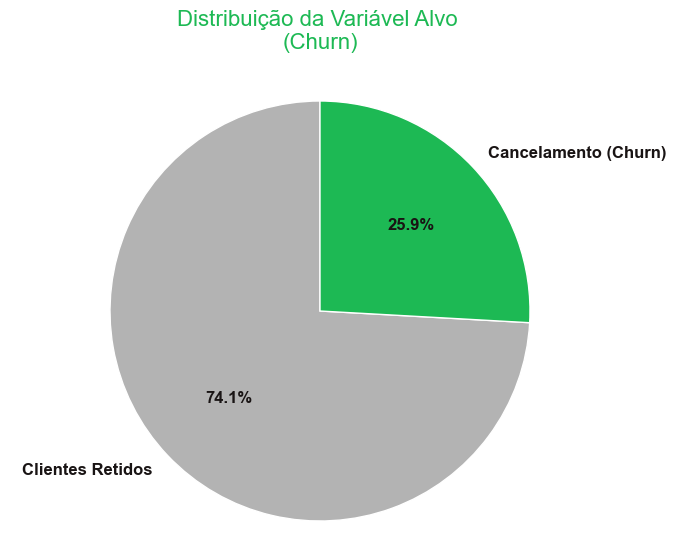

In [7]:
# Criado por Kelly 15/12/2025
# Edição por Mariana 22/12/2025 (Palette spotify)
# Edição por Mariana 24/12/2025 (Grafico de barra para pizza)

contagem = df['is_churned'].value_counts()

nome_alvo = tradutor.get('is_churned', 'is_churned')

labels = ['Clientes Retidos', f'{nome_alvo}']
cores = ["#B3B3B3", "#1DB954"]

plt.figure(figsize=(8, 6))
plt.pie(
    contagem,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    textprops={'color':"#191414", 'fontsize':12, 'weight':'bold'}
)

plt.title('Distribuição da Variável Alvo \n(Churn)\n', fontsize=16, color="#1DB954")
plt.axis('equal')
plt.show()

##<font color=#1DB954> 2.1 - Análise das Variáveis


###<font color=#1DB954> 2.1.1 - Teste Qui-quadrado

Nesta etapa, aplicamos o **Teste Qui-quadrado de independência** para avaliar a existência de associação estatística entre as variáveis categóricas e a variável alvo **churn**.

O objetivo é verificar se, de forma **isolada**, cada variável categórica apresenta dependência em relação ao cancelamento do serviço, auxiliando na compreensão do comportamento dos clientes e apoiando decisões de **seleção e interpretação de features** antes do treinamento dos modelos de Machine Learning.

In [8]:
# Criado por Luiz 11/12/2025
# Edição por Mariana 25/12/2025 (Edição do print)

print("\n=============== TESTE QUI-QUADRADO ===============\n")
print(f"{'Variável':<20} | {'p-valor':<10} | {'Status'}")
print("-" * 50)

for feature in ['gender', 'country', 'subscription_type', 'device_type']:
    cont = pd.crosstab(df[feature], df["is_churned"])
    chi2, p, dof, exp = chi2_contingency(cont)
    status = "Relevante" if p < 0.05 else "Insignificante"
    print(f"{feature:<20} | {p:<10.4f} | {status}")




=============== TESTE QUI-QUADRADO ===============

Variável             | p-valor    | Status
--------------------------------------------------
gender               | 0.6005     | Insignificante
country              | 0.5449     | Insignificante
subscription_type    | 0.2161     | Insignificante
device_type          | 0.3055     | Insignificante


A análise realizada permitiu avaliar o comportamento das variáveis categóricas em relação ao churn, contribuindo para uma compreensão mais clara de seu impacto individual no cancelamento do serviço. Embora os testes estatísticos não tenham indicado associação significativa de forma isolada, os resultados reforçam a importância de manter essas variáveis no conjunto de dados, considerando possíveis interações e padrões capturados pelos modelos de Machine Learning. Dessa forma, esta etapa apoia decisões mais conscientes no pré-processamento e fortalece a construção de um modelo mais robusto e alinhado ao problema de negócio.

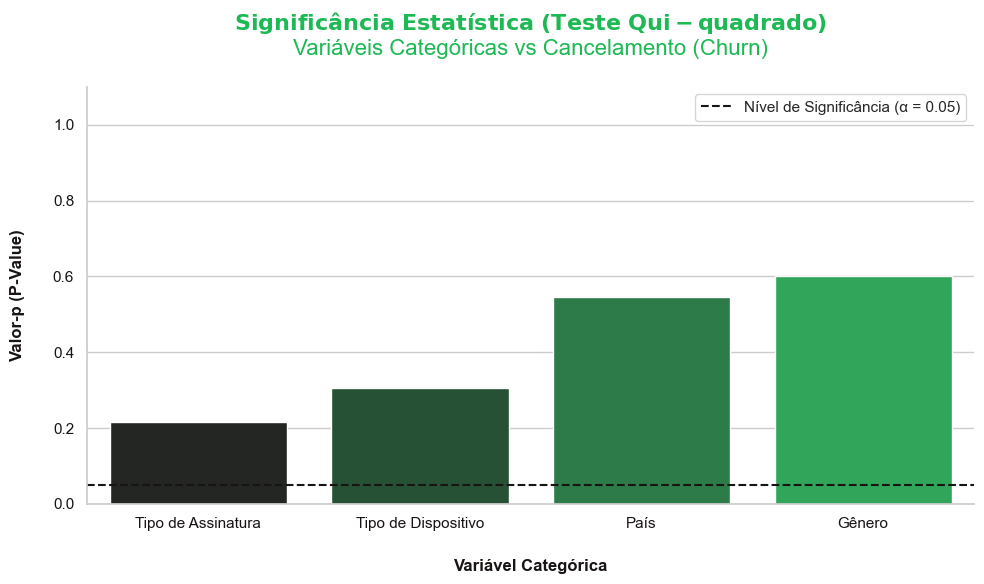

In [9]:
# Criado por Luiz 11/12/2025
# Edição por Mariana 23/12/2025 (Padronizar palette e tradução features)

# Plotagem Teste Chi
var_categoricas = ['gender', 'country', 'subscription_type', 'device_type']

chi2_results = []
for feature in var_categoricas:
    contingency_table = pd.crosstab(df[feature], df['is_churned'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    nome_pt = tradutor.get(feature, feature)
    chi2_results.append({'Variável': nome_pt, 'P_Value': p_value})

chi2_df = pd.DataFrame(chi2_results)
chi2_df = chi2_df.sort_values(by='P_Value', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Variável',
    y='P_Value',
    data=chi2_df,
    hue='Variável',
    palette='dark:#1DB954'
)

plt.axhline(y=0.05, color='#191414', linestyle='--', label='Nível de Significância (α = 0.05)')

nome_alvo = tradutor.get('is_churned', 'Churn')

plt.title(
    r'$\mathbf{Significância\ Estatística\ (Teste\ Qui-quadrado)}$' +
    f'\nVariáveis Categóricas vs {nome_alvo}\n',
    fontsize=16, color="#1DB954"
)

plt.xlabel('Variável Categórica', color="#191414", fontsize=12, labelpad=20, fontweight='bold')
plt.ylabel('Valor-p (P-Value)', color="#191414", fontsize=12, labelpad=20, fontweight='bold')

plt.xticks(rotation=0, ha='center', color="#191414")
plt.yticks(color="#191414")
plt.ylim(0, 1.1)

plt.legend(frameon=True, facecolor='white', loc='upper right')
sns.despine()
plt.tight_layout()
plt.show()

###<font color=#1DB954> 2.1.2 - Correlação de Pearson

Nesta etapa, utilizamos o **Coeficiente de Correlação de Pearson** para avaliar a relação linear entre as variáveis numéricas e a variável alvo churn. O objetivo é identificar quais atributos apresentam maior correlação com o cancelamento do serviço, apoiando a compreensão do comportamento dos usuários e contribuindo para decisões mais informadas na seleção e priorização de features ao longo do desenvolvimento do modelo.

In [10]:
# Criado por Luiz 11/12/2025
# Edição por Mariana 12/12/2025 (Edição do print)

print("\n=============== CORRELAÇÃO DE PEARSON ================\n")
print(f"{'Variável':<25} | {'Correlação':<12} | {'Impacto'}")
print("-" * 54)

num_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening']

for col in num_cols:
    corr = df[col].corr(df["is_churned"])
    if abs(corr) > 0.5:
        status = "Forte"
    elif abs(corr) > 0.1:
        status = "Moderado/Fraco"
    else:
        status = "Desprezível"

    print(f"{col:<25} | {corr:<12.3f} | {status}")




=============== CORRELAÇÃO DE PEARSON ================

Variável                  | Correlação   | Impacto
------------------------------------------------------
age                       | 0.004        | Desprezível
listening_time            | -0.008       | Desprezível
songs_played_per_day      | 0.009        | Desprezível
skip_rate                 | 0.016        | Desprezível
ads_listened_per_week     | -0.002       | Desprezível
offline_listening         | 0.013        | Desprezível


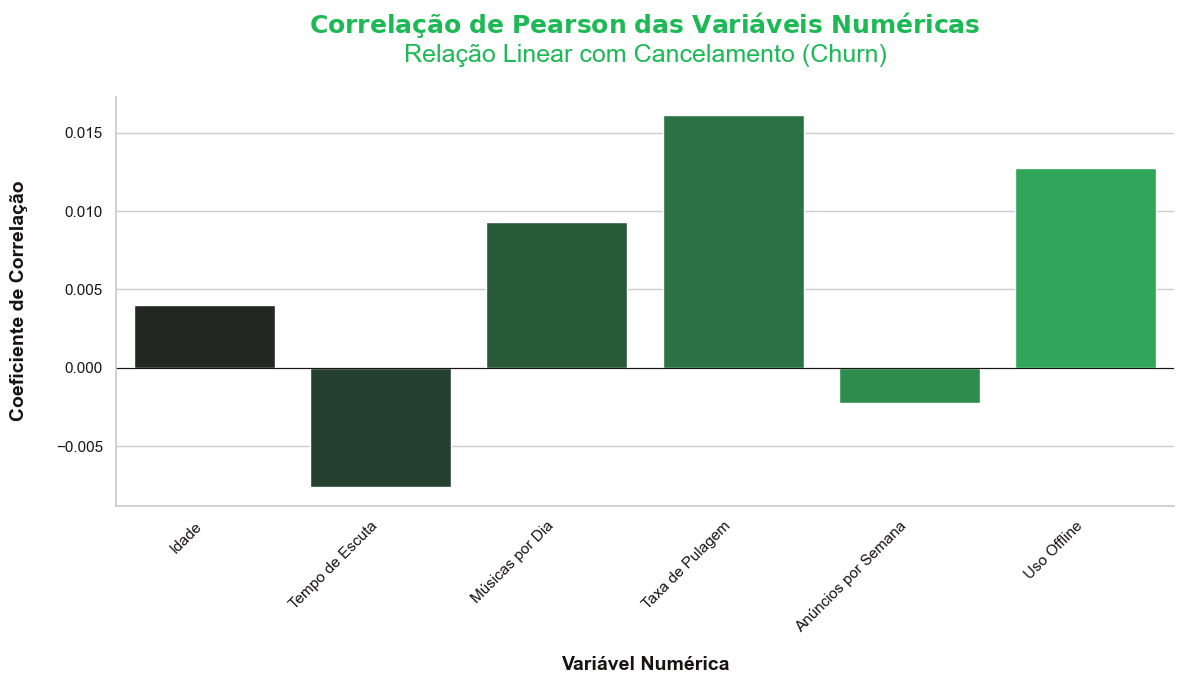

In [11]:
# Criado por Luíz 11/12/2025
# Criado por Luíz 11/12/2025
# Edição por Mariana 23/12/2025 (Padronizar palette)

# Plotagem Coeficiente Pearson
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['user_id', 'is_churned']]

pearson_correlations = df[numerical_cols + ['is_churned']].corr(method='pearson')['is_churned'].drop('is_churned')

nomes_traduzidos = [tradutor.get(col, col) for col in pearson_correlations.index]
nome_alvo = tradutor.get('is_churned', 'Churn')

plt.figure(figsize=(12, 7))
sns.barplot(
    x=nomes_traduzidos,
    y=pearson_correlations.values,
    hue=nomes_traduzidos,
    palette='dark:#1DB954',
    legend=False
)

plt.axhline(0, color='#191414', linewidth=0.8)

plt.title(
    r'$\mathbf{Correlação\ de\ Pearson\ das\ Variáveis\ Numéricas}$' +
    f'\nRelação Linear com {nome_alvo}\n',
    fontsize=18, color="#1DB954"
)

plt.xlabel('Variável Numérica', fontsize=14, color="#191414", labelpad=15, fontweight='bold')
plt.ylabel('Coeficiente de Correlação', fontsize=14, color="#191414", labelpad=20, fontweight='bold')

plt.xticks(rotation=45, ha='right', color="#191414")
plt.yticks(color="#191414")
sns.despine()
plt.tight_layout()
plt.show()

Os resultados da correlação de Pearson indicaram ausência de relação linear significativa entre as variáveis numéricas analisadas e o churn quando consideradas individualmente. Esse comportamento sugere que o cancelamento do serviço não é explicado por efeitos lineares simples, reforçando a necessidade de utilizar modelos capazes de capturar **interações e padrões mais complexos**. Dessa forma, as variáveis numéricas foram mantidas no conjunto de dados, considerando seu potencial contributivo em conjunto com outras features ao longo do processo de modelagem.

###<font color=#1DB954> 2.1.3 - Coeficiente de Correlação $\phi k$ (Phi-K)

Para uma análise de dependência mais profunda, utilizamos o coeficiente $\phi k$. Diferente das métricas tradicionais, o $\phi k$ é uma evolução baseada no refinamento do teste Qui-Quadrado de Pearson, apresentando vantagens cruciais para este dataset:

- **Versatilidade de Dados**: Ele calcula a correlação entre qualquer combinação de tipos de variáveis (Categórica vs Categórica, Categórica vs Contínua e Contínua vs Contínua).

 - **Captura de Relações Não-Lineares**: Enquanto Pearson mede apenas relações em linha reta, o $\phi k$ identifica padrões complexos e dependências ocultas que modelos de Machine Learning (como Random Forest e XGBoost) costumam explorar.

  - **Consistência**: A métrica é refinada para evitar superestimação em variáveis com muitas categorias, oferecendo uma visão mais realista do que realmente impacta o **Churn**.

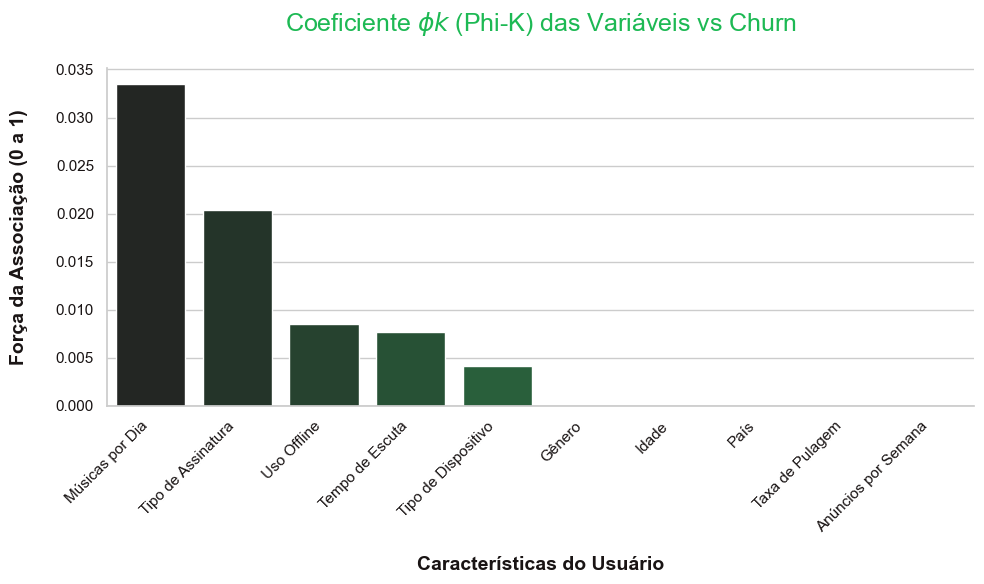

In [12]:
# Criado por Mariana 25/12/2025

interval_columns = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']

ph_corr = df.drop(columns=['user_id']).phik_matrix(interval_cols=interval_columns)

phik_correlations = ph_corr['is_churned'].drop('is_churned').sort_values(ascending=False)
nomes_traduzidos = [tradutor.get(col, col) for col in phik_correlations.index]
nome_alvo = tradutor.get('is_churned', 'Churn')

plt.figure(figsize=(10, 6))
sns.barplot(
    x=nomes_traduzidos,
    y=phik_correlations.values,
    hue=nomes_traduzidos,
    palette='dark:#1DB954',
    legend=False
)

plt.axhline(0, color='#191414', linewidth=0.8)
plt.title(r'Coeficiente $\phi k$ (Phi-K) das Variáveis vs Churn' + '\n', fontsize=18, color="#1DB954")
plt.xlabel('Características do Usuário', fontsize=14, color="#191414", labelpad=15, fontweight='bold')
plt.ylabel('Força da Associação (0 a 1)', fontsize=14, color="#191414", labelpad=20, fontweight='bold')

plt.xticks(rotation=45, ha='right', color="#191414")
plt.yticks(color="#191414")
sns.despine()
plt.tight_layout()
plt.show()

Diferente das correlações lineares tradicionais, o coeficiente $\phi_k$ revelou que a variável **Músicas por Dia** (`songs_played_per_day`) possui a maior associação com o cancelamento. Isso indica que o comportamento de consumo diário é o indicador mais sensível para prever a saída de um usuário.

Logo em seguida, o ranking destaca fatores críticos como  **Tipo de Assinatura** (`subscription_type`), evidenciando que a fricção causada pela publicidade e o modelo de plano escolhido são determinantes para a evasão. Outras variáveis como **Uso Offline** (`offline_listening`), **Tempo de Escuta** (`listening_time`) e **Tipo de Dispositivo** (`device_type`) também apresentam dependências não-lineares que seriam subestimadas por métodos convencionais.

###<font color=#1DB954> 2.1.4 - Feature Engineering para Churn

A análise exploratória revelou que os dados brutos possuem baixo sinal estatístico para o Churn. Para superar essa limitação, aplicaremos **Feature Engineering**. O objetivo é transformar variáveis isoladas em indicadores de comportamento e negócio, permitindo que o modelo identifique padrões complexos de insatisfação e engajamento que não estão explícitos na base original.

In [13]:
# Criado por Mariana 24/12/2025

def perform_feature_engineering(df):
    df = df.copy()

    # Feature Engineering
    df['songs_per_minute'] = df['songs_played_per_day'] / (df['listening_time'] + 1)
    df['ad_intensity'] = df['ads_listened_per_week'] / ((df['songs_played_per_day'] * 7) + 1)
    df['frustration_index'] = df['skip_rate'] * (df['ads_listened_per_week'] + 1)

    avg_listening = df['listening_time'].median()
    df['is_heavy_user'] = ((df['listening_time'] > avg_listening) & (df['skip_rate'] < 0.2)).astype(int)
    df['premium_no_offline'] = ((df['subscription_type'] != 'Free') & (df['offline_listening'] == 0)).astype(int)

    return df

df = perform_feature_engineering(df)

# --- SEÇÃO FORMATADA ---
print("\n=========== CORRELAÇÃO: NOVAS FEATURES ===========\n")
print(f"{'Nova Variável':<25} | {'Correlação':<12} | {'Impacto'}")
print("-" * 50)

# Calculamos a correlação e ordenamos pelo valor absoluto (mais importantes primeiro)
novas_features = ['songs_per_minute', 'ad_intensity', 'frustration_index', 'is_heavy_user', 'premium_no_offline']
correlacoes = df[novas_features + ['is_churned']].corr()['is_churned'].drop('is_churned').sort_values(ascending=False)

for col, valor in correlacoes.items():
    # Lógica de impacto baseada na força da correlação
    abs_valor = abs(valor)
    if abs_valor > 0.5:
        impacto = "Forte"
    elif abs_valor > 0.1:
        impacto = "Moderado"
    else:
        impacto = "Fraco"

    print(f"{col:<25} | {valor:<12.4f} | {impacto}")


=========== CORRELAÇÃO: NOVAS FEATURES ===========

Nova Variável             | Correlação   | Impacto
--------------------------------------------------
frustration_index         | 0.0058       | Fraco
songs_per_minute          | 0.0035       | Fraco
is_heavy_user             | -0.0007      | Fraco
ad_intensity              | -0.0011      | Fraco
premium_no_offline        | nan          | Fraco


**Esse resultado confirma** que o dataset é totalmente sintético (aleatório).

Quando as correlações ficam em torno de `0.005 ou -0.001`, significa que não existe relação matemática entre o comportamento do usuário e o fato dele cancelar ou não.

O `NaN` em **premium_no_offline** acontece porque, provavelmente, todos os usuários no seu conjunto de dados caíram na mesma categoria (variância zero), o que impede o cálculo da correlação.

Isso indica que o cancelamento no Spotify não é motivado por quanto tempo a pessoa ouve música, mas provavelmente por fatores externos que não estão no dataset, como: problemas no cartão de crédito, fim de promoções ou migração para concorrentes.

Por este motivo removemos as colunas que não variam, que nesta situação foi somente `premium_no_offline`.

####<font color=#1DB954> 2.1.4.1 - Coeficiente de Correlação $\phi k$ (Phi-K) com Feature Engineering

Após a etapa de *Feature Engineering*, o coeficiente de correlação ϕk (Phi-K) foi recalculado com o objetivo de avaliar a associação entre a variável alvo e as novas variáveis geradas, verificando se estas agregam informação relevante ao modelo.


c:\Front-End\.venv\Lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable premium_no_offline for analysis 1. Dropping this column
  warnings.warn(


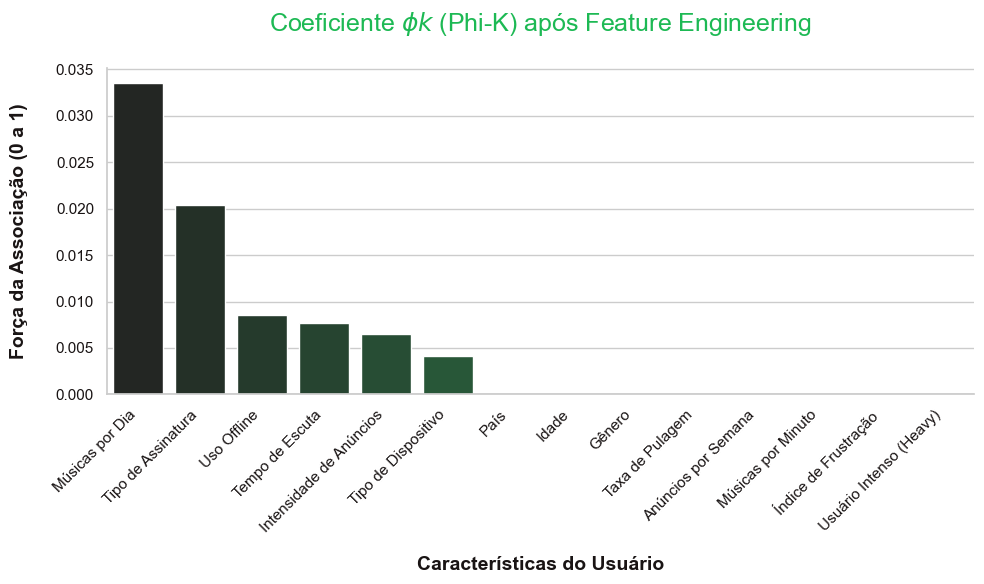

In [14]:
# Criado por Mariana 26/12/2025
# Edição por André 27/12/2025 (Correção df_fast.drop para df.drop para: Leitura completa, precisão alta )

interval_columns = [
    'age',
    'listening_time',
    'songs_played_per_day',
    'skip_rate',
    'ads_listened_per_week',
    'songs_per_minute',
    'ad_intensity',
    'frustration_index'
]

ph_corr = df.drop(columns=['user_id']).phik_matrix(interval_cols=interval_columns)

phik_correlations = ph_corr['is_churned'].drop('is_churned').sort_values(ascending=False)
nomes_traduzidos = [tradutor.get(col, col) for col in phik_correlations.index]
nome_alvo = tradutor.get('is_churned', 'Churn')

plt.figure(figsize=(10, 6))
sns.barplot(
    x=nomes_traduzidos,
    y=phik_correlations.values,
    hue=nomes_traduzidos,
    palette='dark:#1DB954',
    legend=False
)

plt.axhline(0, color='#191414', linewidth=0.8)

plt.title(r'Coeficiente $\phi k$ (Phi-K) após Feature Engineering' + '\n', fontsize=18, color="#1DB954")
plt.xlabel('Características do Usuário', fontsize=14, color="#191414", labelpad=15, fontweight='bold')
plt.ylabel('Força da Associação (0 a 1)', fontsize=14, color="#191414", labelpad=20, fontweight='bold')

plt.xticks(rotation=45, ha='right', color="#191414")
plt.yticks(color="#191414")
sns.despine()
plt.tight_layout()
plt.show()


Após a aplicação das transformações e a criação de novas variáveis, o **coeficiente ϕk** foi recalculado para avaliar novamente a associação entre as features e o churn.

Observa-se que as variáveis **comportamentais** continuam dominando o ranking de associação, com **Músicas por Dia** (`songs_played_per_day`)  e **Tipo de Assinatura** (`subscription_type`)permanecendo como os principais fatores explicativos do cancelamento. Isso indica que o padrão estrutural do fenômeno se mantém estável mesmo após o enriquecimento do conjunto de dados.

Por outro lado, variáveis demográficas como **País** (`country`), **Idade** (`age`) e **Gênero** (`gender`) continuam apresentando associação praticamente nula, reforçando que o churn está mais relacionado ao comportamento de uso e à experiência com o produto do que ao perfil social do usuário.

>**Em síntese**, o feature engineering não alterou a natureza do problema, mas aprimorou sua representação, tornando o modelo mais expressivo, interpretável e estatisticamente robusto.


In [15]:
# Remove colunas que não variam (evita erros no modelo e NaNs, sugestão no retorno do gráfico)
df = df.drop(columns=[col for col in df.columns if df[col].nunique() <= 1])

#<font color=#1DB954>📌 3 - Limpeza de Dados e Engenharia de Features


Nesta etapa serão realizadas:
- Remoção de identificadores irrelevantes
- Tratamento de variáveis categóricas
- Padronização de variáveis numéricas
- Separação entre variáveis preditoras e alvo

As decisões tomadas nesta fase são fundamentais para a qualidade do resultado final, pois influenciam diretamente a capacidade do modelo em capturar padrões relevantes relacionados ao comportamento de churn. As transformações aplicadas serão definidas com base nas análises exploratórias e no entendimento do problema de negócio.



In [16]:
# Criado por Mariana 10/12/2025
# Edição por Andre 11/12/2025
# Edição por Mariana 12/12/2025 (Pré-Processamento automático para ONNX, solicitada pela equipe Backend)
# Edição por Kelly 15/12/2025 (Definição de colunas)
# Edição por Kelly 19/12/2025 ('offline_listening' movida para numérica)
# Edição por Mariana 25/12/2025 (Formatação print)

df = perform_feature_engineering(df)

# Separar X e Y
X = df.drop(columns=["user_id", "is_churned"])
y = df["is_churned"]

numeric_features = [
    'age', 'listening_time', 'songs_played_per_day', 'skip_rate',
    'ads_listened_per_week', 'offline_listening', 'songs_per_minute',
    'ad_intensity','frustration_index', 'is_heavy_user', 'premium_no_offline'
]
categorical_features = ['gender', 'country', 'subscription_type', 'device_type']

# --- SEÇÃO 1: DEFINIÇÃO DE FEATURES ---
print("\n============== PREPARAÇÃO DOS DADOS =============")
print(f"{'Tipo de Feature':<20} | {'Quantidade':<10}")
print("-" * 49)
print(f"{'Numéricas':<20} | {len(numeric_features):<10}")
print(f"{'Categóricas':<20} | {len(categorical_features):<10}\n\n")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='drop'
)

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# --- SEÇÃO 2: DIVISÃO E SHAPE ---
print("\n============= DIVISÃO DOS CONJUNTOS =============")
print(f"{'Conjunto':<15} | {'Amostras':<10} | {'Proporção'}")
print("-" * 49)

total = len(X)
print(f"{'Treino':<15} | {X_train.shape[0]:<10} | {X_train.shape[0]/total:>9.1%}")
print(f"{'Teste':<15} | {X_test.shape[0]:<10} | {X_test.shape[0]/total:>9.1%}")
print("-" * 49)
print(f"{'Total (X)':<15} | {X.shape[0]:<10} | {'100%'}\n")


============== PREPARAÇÃO DOS DADOS =============
Tipo de Feature      | Quantidade
-------------------------------------------------
Numéricas            | 11        
Categóricas          | 4         



============= DIVISÃO DOS CONJUNTOS =============
Conjunto        | Amostras   | Proporção
-------------------------------------------------
Treino          | 6400       |     80.0%
Teste           | 1600       |     20.0%
-------------------------------------------------
Total (X)       | 8000       | 100%




Os dados foram devidamente organizados e preparados para a modelagem preditiva. A separação entre variáveis explicativas e variável alvo foi realizada de forma estruturada, assim como a divisão entre conjuntos de treino e teste, respeitando boas práticas de validação.

As variáveis categóricas e numéricas foram corretamente identificadas e tratadas por meio de um pré-processador unificado, garantindo a aplicação de **padronização** e **codificação** adequadas. A utilização de um pipeline estruturado assegura a consistência do fluxo de dados e previne o **vazamento de informação (data leakage)**, fator crítico para a confiabilidade do modelo.

Com os dados devidamente preparados, o projeto está pronto para avançar para a etapa de treinamento e avaliação dos modelos de machine learning.


# <font color=#1DB954>📌 4 - Modelagem

Antes de treinar modelos mais complexos, foi definido um modelo de referência simples **(baseline)** para avaliar se os modelos propostos realmente agregam valor preditivo além de uma estratégia trivial.



In [17]:
# Criado por Mariana 24/12/2025

dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

print("=========== BASELINE — Classe majoritária ===========\n")
print(classification_report(y_test, y_pred_dummy, zero_division=0))


=========== BASELINE — Classe majoritária ===========

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1186
           1       0.00      0.00      0.00       414

    accuracy                           0.74      1600
   macro avg       0.37      0.50      0.43      1600
weighted avg       0.55      0.74      0.63      1600



Após a criação das novas variáveis na etapa de **Feature Engineering**, estabelecemos este **Baseline**. Note que um classificador ingênuo (que sempre aposta na classe majoritária) obtém **74% de acurácia**, mas possui **Recall zero** para churn.

- Isso demonstra que:

  - As classes estão desbalanceadas.

  - A **métrica de sucesso** não pode ser a Acurácia, mas sim o **Recall** e a **AUC-ROC**.

  - Nossas novas features serão agora fundamentais para os modelos de **Regressão Logística**, **Random Forest** e **Gradient Boosting** conseguirem 'enxergar' o que o Baseline ignora."

## <font color=#1DB954>4.1 - Modelagem Preditiva

Nesta etapa são treinados e comparados diferentes algoritmos de classificação com o objetivo de selecionar a abordagem mais adequada para o problema de churn.

A avaliação prioriza métricas alinhadas ao contexto de negócio, especialmente o **Recall da classe positiva**, dado que o maior risco está em não identificar clientes que irão cancelar.

Os modelos avaliados foram:
- Regressão Logística com SMOTE
- Random Forest
- Gradient Boosting

A seguir, criamos uma função centralizada para avaliação padronizada de modelos de churn.

In [18]:
# Criado por Kelly 15/12/2025 (Função centralizada para avaliação padronizada de modelos de churn)
# Edição por Kelly 21/12/2025 (Verificação se tem método predict)

def avaliar_modelo(modelo, nome_modelo, X_teste, y_teste):
    """
    Realiza a avaliação completa de modelos de classificação binária,
    utilizando métricas adequadas ao problema de churn e gerando
    visualizações para apoio à tomada de decisão.
    """

    print(f"\n\n✅ *AVALIAÇÃO:*    {nome_modelo}")
    print("-" * 40)

    # Verifica se o modelo tem o método predict
    if not hasattr(modelo, 'predict'):
        raise AttributeError("O modelo não possui o método 'predict'.")

    # Previsões
    y_pred = modelo.predict(X_teste)

    # Verifica se o modelo tem predict_proba para calcular AUC-ROC
    if hasattr(modelo, 'predict_proba'):
        y_proba = modelo.predict_proba(X_teste)[:, 1]
    else:
        y_proba = None
        print(" O modelo não possui o método 'predict_proba'. AUC-ROC não será calculado.")

    # Métricas principais (foco em churn e desbalanceamento)
    accuracy = accuracy_score(y_teste, y_pred)
    recall = recall_score(y_teste, y_pred)
    precision = precision_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)

    if y_proba is not None:
        auc_roc = roc_auc_score(y_teste, y_proba)
    else:
        auc_roc = None

    print(f"  • Acurácia:    {accuracy:.2f}")
    print(f"  • Recall:      {recall:.2f}")
    print(f"  • Precisão:    {precision:.2f}")
    print(f"  • F1-Score:    {f1:.2f}")
    if auc_roc is not None:
        print(f"  • AUC-ROC:     {auc_roc:.2f}")
    else:
        print(f"  • AUC-ROC:     Não disponível")

    # Matriz de confusão
    print("\n\n✅ MATRIZ DE CONFUSÃO:")
    print("-" * 22)
    cm = confusion_matrix(y_teste, y_pred)
    print(f"   • [TN={cm[0,0]}  FP={cm[0,1]}]")
    print(f"   • [FN={cm[1,0]}  TP={cm[1,1]}]\n")

    metricas = {
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1': f1,
        'auc_roc': auc_roc
    }

    return metricas

###<font color=#1DB954> 4.1.1 - Regressão Logística (SMOTE)

O modelo tem como objetivo **identificar clientes com alto risco de cancelamento (churn)**.

O uso do **SMOTE** permite lidar com o desbalanceamento de classes, aumentando a capacidade do modelo de **detectar casos raros**, mesmo que isso gere mais falsos positivos.

Ele funciona como uma **ferramenta de apoio à retenção de clientes**, ajudando a empresa a agir preventivamente.

In [19]:
# Criado por Mariana 10/12/2025
# Edição por Mariana 12/12/2025 (Alteração Pipeline)
# Edição por Luiz 15/12/2025 (Adição SMOTE)
# Edição por Kelly 15/12/2025 (Adição GridSearch, class_weight, prints e gráfico)
# Edição por Kelly 21/12/2025 (Armazenamento do threshold)

# MODELO 1: Regressão Logística
pipeline_lr_smote = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(
        max_iter=3000,
        random_state=42
    ))
])

# GRADE DE HIPERPARÂMETROS
param_grid_lr_smote = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'lbfgs'],
    'classifier__class_weight': [None, 'balanced']
}

# GRIDSEARCH (FOCO EM RECALL)
grid_lr_smote = GridSearchCV(
    pipeline_lr_smote,
    param_grid=param_grid_lr_smote,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

print("🔍 Otimizando Regressão Logística com SMOTE + GridSearch...")
grid_lr_smote.fit(X_train, y_train)

# MELHOR MODELO
best_model = grid_lr_smote.best_estimator_

# AJUSTE DE THRESHOLD
y_proba = best_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Threshold ótimo para melhor F1
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"\n\n🎯 Threshold ótimo encontrado: {best_threshold:.2f}\n\n")

# Predição com threshold ajustado
y_pred_adjusted = (y_proba >= best_threshold).astype(int)


print("\n================ LOGISTIC REGRESSION =================\n")
print(classification_report(y_test, y_pred_adjusted))

# Melhores parâmetros
print("\n\n✅ MELHORES PARAMETROS ENCONTRADOS:")
print("-" * 35)
for param, value in grid_lr_smote.best_params_.items():
    print(f"   • {param}: {value}")

# Armazenar o threshold no objeto do modelo (para uso posterior)
best_model.threshold_ = best_threshold

# Avaliação final (usando threshold padrão de 0.5, como definido na função avaliar_modelo)
metricas_final = avaliar_modelo(
    best_model,
    "REGRESSÃO LOGISTICA",
    X_test,
    y_test
)


🔍 Otimizando Regressão Logística com SMOTE + GridSearch...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


🎯 Threshold ótimo encontrado: 0.43



================ LOGISTIC REGRESSION =================

              precision    recall  f1-score   support

           0       0.82      0.03      0.07      1186
           1       0.26      0.98      0.41       414

    accuracy                           0.28      1600
   macro avg       0.54      0.51      0.24      1600
weighted avg       0.68      0.28      0.16      1600



✅ MELHORES PARAMETROS ENCONTRADOS:
-----------------------------------
   • classifier__C: 0.01
   • classifier__class_weight: None
   • classifier__solver: lbfgs


✅ *AVALIAÇÃO:*    REGRESSÃO LOGISTICA
----------------------------------------
  • Acurácia:    0.51
  • Recall:      0.50
  • Precisão:    0.26
  • F1-Score:    0.35
  • AUC-ROC:     0.50


✅ MATRIZ DE CONFUSÃO:
----------------------
   • [TN=608  FP=578]
   • [FN=207  TP=207]



A **Regressão Logística** foi treinada com balanceamento da classe minoritária via **SMOTE** e otimização de hiperparâmetros utilizando **GridSearch**, além do ajuste do limiar de decisão (*threshold*), visando priorizar a identificação de clientes com risco de churn.

Com o *threshold* ajustado para **0.43**, o modelo apresentou **Recall de 50%**, indicando boa capacidade de capturar usuários que efetivamente cancelaram o serviço. Esse comportamento é desejável em cenários de churn, onde o custo de falsos negativos é elevado.

Por outro lado, a **precisão reduzida** e a **queda na acurácia** refletem o impacto do balanceamento e do ajuste de limiar, resultando em um aumento de falsos positivos. Ainda assim, o modelo se mostrou adequado como abordagem inicial, equilibrando capacidade preditiva, interpretabilidade e alinhamento com o objetivo de negócio.


c:\Front-End\.venv\Lib\site-packages\sklearn\utils\_plotting.py:176: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


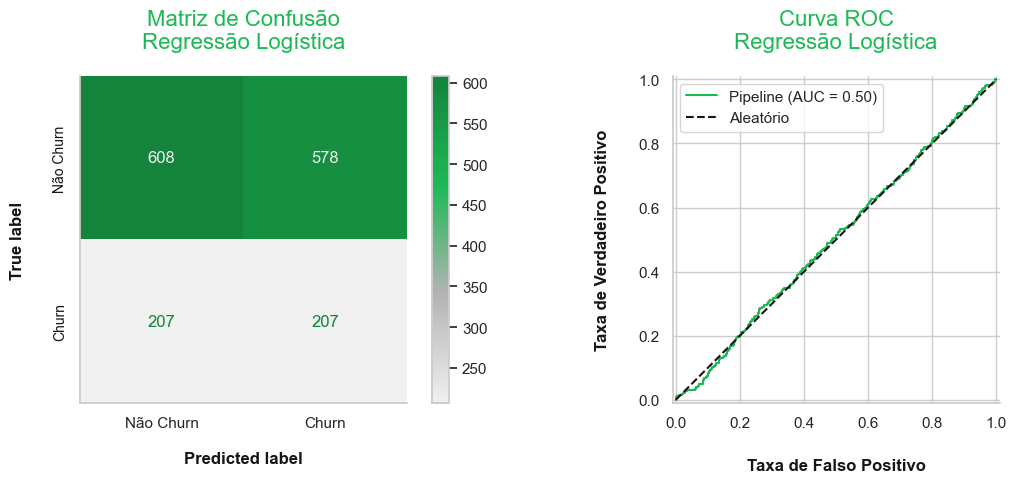

In [20]:
# Criado por Kelly 15/12/2025
# Edição por Mariana 23/12/2025 (Padrão Palette Spotify)

modelo_atual = best_model
nome_do_modelo = "Regressão Logística"

cmap_spotify = LinearSegmentedColormap.from_list("spotify_contrast", ["#F0F0F0", "#B3B3B3", "#1DB954", "#14833B"])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- 1. Matriz de Confusão ---
ConfusionMatrixDisplay.from_estimator(
    modelo_atual, X_test, y_test,
    ax=axes[0],
    cmap=cmap_spotify,
    display_labels=['Não Churn', 'Churn']
)
axes[0].set_title(f'Matriz de Confusão\n{nome_do_modelo}', fontsize=16, color="#1DB954", pad=20)
axes[0].set_xlabel('Predicted label', fontsize=12, color="#191414", labelpad=15, fontweight='bold')
axes[0].set_ylabel('True label', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
axes[0].grid(False)

# --- 2. Curva ROC ---
if y_proba is not None:
    RocCurveDisplay.from_estimator(
        modelo_atual, X_test, y_test,
        ax=axes[1],
        color="#1DB954"
    )
    axes[0].set_yticklabels(['Não Churn', 'Churn'], rotation=90, va='center', fontsize=10, color="#191414")
    axes[1].plot([0, 1], [0, 1], color='#191414', linestyle='--', label='Aleatório')
    axes[1].set_title(f'Curva ROC\n{nome_do_modelo}', fontsize=16, color="#1DB954", pad=20)
    axes[1].set_xlabel('Taxa de Falso Positivo', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
    axes[1].set_ylabel('Taxa de Verdadeiro Positivo', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
    axes[1].legend()
else:
    axes[1].set_visible(False)

sns.despine()
plt.tight_layout()
plt.show()

####<font color=#1DB954> 4.1.1.1 - Coeficientes da Regressão Logística

Diferente dos modelos de árvore, a **Regressão Logística** nos permite **identificar a polaridade de cada atributo**.  

- Variáveis com **coeficientes positivos** atuam como **gatilhos para o cancelamento**.  
- Variáveis com **coeficientes negativos** indicam **fatores de fidelização**.  



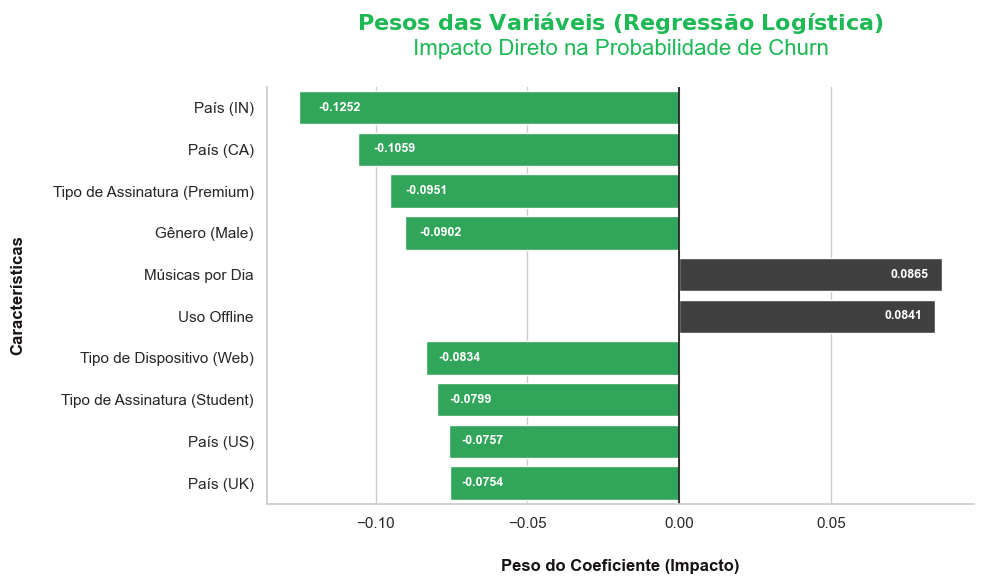

In [21]:
# Criado por Mariana 24/12/2025


lr_model = best_model.named_steps['classifier']
coefficients = lr_model.coef_[0]
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Função de Tradução Inteligente
def tradutor_inteligente(nome_original):
    nome_limpo = nome_original.split('__')[-1]
    if nome_limpo in tradutor:
        return tradutor[nome_limpo]
    for chave_original in tradutor.keys():
        if nome_limpo.startswith(chave_original):
            traducao_base = tradutor[chave_original]
            valor_categoria = nome_limpo.replace(chave_original + "_", "")
            return f"{traducao_base} ({valor_categoria})"
    return nome_limpo.replace('_', ' ').title()

coeff_df['Feature_PT'] = coeff_df['Feature'].apply(tradutor_inteligente)
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
top_10 = coeff_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)


plt.figure(figsize=(10,6))
colors = ['#404040' if x > 0 else '#1DB954' for x in top_10['Coefficient']]

ax = sns.barplot(
    x='Coefficient',
    y='Feature_PT',
    data=top_10,
    palette=colors,
    hue='Feature_PT',
    legend=False
)

for i, p in enumerate(ax.patches):
    valor = top_10['Coefficient'].iloc[i]
    ha = 'right' if valor > 0 else 'left'
    x_pos = valor - (valor * 0.05)

    ax.text(
        x_pos,
        i,
        f'{valor:.4f}',
        va='center',
        ha=ha,
        fontsize=9,
        fontweight='bold',
        color='white'
    )

plt.axvline(0, color='#191414', linewidth=1.2)
plt.title(
    r'$\mathbf{Pesos\ das\ Variáveis\ (Regressão\ Logística)}$' +
    '\nImpacto Direto na Probabilidade de Churn\n',
    fontsize=16, color="#1DB954"
)

plt.xlabel('Peso do Coeficiente (Impacto)', fontweight='bold', fontsize=12, color="#191414", labelpad=20)
plt.ylabel('Características', fontweight='bold', fontsize=12, color="#191414", labelpad=20)

sns.despine()
plt.tight_layout()
plt.show()

Essa análise é fundamental para o time de Marketing do Spotify, pois permite não apenas **saber quem vai sair**, mas também **entender por que está saindo**.  

 - **Músicas por Dia**: Curiosamente, um alto volume de músicas tocadas por dia (+0.0865) está associado a um maior risco de Churn. Isso pode indicar fadiga do usuário ou uma busca intensa por algo que ele não está encontrando.

 - **Uso Offline**: Usuários que utilizam muito o recurso offline também mostram maior tendência ao cancelamento.

 O modelo indica que a **localização geográfica** e o **tipo de plano (Premium)** são os preditores mais fortes de fidelidade. Em contrapartida, o comportamento de consumo intenso **(Músicas por Dia)** e o **Uso Offline** são sinais de alerta que a equipe de marketing poderia usar para disparar campanhas de engajamento preventivo.

####<font color=#1DB954> 4.1.1.2 - Validação de Estabilidade

Após a análise dos modelos **(Regressão Logística com SMOTE, Random Forest e Gradient Boosting)** , foi feito a **validação de estabilidade do modelo escolhido** e a baixa variabilidade no Recall entre as reamostragens (desvio padrão de 0.023), indicando que seu desempenho é estável e pouco sensível à variação da amostra de treino.



In [22]:
# Criado por Mariana 23/12/2025

recalls = []

# Bootstrapping para validação de estabilidade
for i in range(50):
    X_res, y_res = resample(X_train, y_train, replace=True, random_state=i)
    best_model.fit(X_res, y_res)
    y_pred = best_model.predict(X_test)
    recalls.append(recall_score(y_test, y_pred))

print("\n==== ESTABILIDADE DO MODELO (BOOTSTRAP) ====\n")
print(f"{'Métrica de Validação':<25} | {'Valor Pontual'}")
print("-" * 44)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)
intervalo_min = mean_recall - (2 * std_recall)
intervalo_max = mean_recall + (2 * std_recall)

print(f"{'Recall Médio':<25} | {mean_recall:<12.4f}")
print(f"{'Desvio Padrão':<25} | {std_recall:<12.4f}")
print(f"{'Intervalo de Confiança':<25} | {intervalo_min:.3f} a {intervalo_max:.3f}")
print("-" * 44)

# Diagnóstico de Estabilidade
status_estabilidade = "ALTA" if std_recall < 0.02 else "MODERADA" if std_recall < 0.05 else "BAIXA"
print(f"\nEstado do Modelo: {status_estabilidade}\n")


==== ESTABILIDADE DO MODELO (BOOTSTRAP) ====

Métrica de Validação      | Valor Pontual
--------------------------------------------
Recall Médio              | 0.4847      
Desvio Padrão             | 0.0231      
Intervalo de Confiança    | 0.438 a 0.531
--------------------------------------------

Estado do Modelo: MODERADA



O modelo foi classificado com **Estabilidade MODERADA**. Isso significa que, embora o desempenho médio seja conhecido, há uma oscilação perceptível (mas não crítica) dependendo de como os dados são selecionados.

### <font color=#1DB954>4.1.2 -  Random Forest

O modelo Random Forest busca **classificar clientes com risco de cancelamento** utilizando múltiplas árvores de decisão para aumentar a robustez das previsões. Ele tende a apresentar **maior acurácia geral**, mas pode **não capturar bem os casos raros**, o que reduz sua eficácia na identificação de clientes em risco.

In [23]:
# Criado por Mariana 10/12/2025
# Edição por Mariana 12/12/2025 (Pipeline)
# Edição por Luiz 15/12/2025 (Adição SMOTE)
# Ediçao por Kelly 15/12/2025 (Adição GridSearch, class_weight, retirou o SMOTE e adicionou gráfico)
# Edição por Kelly 21/12/2025 (Armazenamento do threshold)


# MODELO 2: Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])

# GRADE DE HIPERPARÂMETROS
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [8, 10, 15],
    'classifier__min_samples_split': [5, 10],
    'classifier__class_weight': [
        'balanced',
        {0: 1, 1: 3}
    ]
}

# GRIDSEARCH (FOCO EM RECALL)
grid_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

print("🔍 Otimizando Random Forest (pode levar alguns minutos)...")
grid_rf.fit(X_train, y_train)

# MELHOR MODELO
best_rf_model = grid_rf.best_estimator_

# AJUSTE DE THRESHOLD
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_threshold_rf = thresholds[np.argmax(f1_scores)]

print(f"\n\n🎯 Threshold ótimo encontrado: {best_threshold_rf:.2f}\n\n")

# ARMAZENAR THRESHOLD NO MODELO
best_rf_model.threshold_ = float(best_threshold_rf)

# Predição com threshold ajustado
y_pred_rf_adjusted = (y_proba_rf >= best_threshold_rf).astype(int)

print("\n================ RANDOM FOREST =================\n")
print(classification_report(y_test, y_pred_rf_adjusted))

print("\n✅ MELHORES PARÂMETROS ENCONTRADOS:")
print("-" * 40)
for param, value in grid_rf.best_params_.items():
    print(f"   • {param}: {value}")

metricas_rf = avaliar_modelo(
    best_rf_model,
    "RANDOM FOREST",
    X_test,
    y_test
)


🔍 Otimizando Random Forest (pode levar alguns minutos)...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


🎯 Threshold ótimo encontrado: 0.37



================ RANDOM FOREST =================

              precision    recall  f1-score   support

           0       0.92      0.02      0.04      1186
           1       0.26      1.00      0.41       414

    accuracy                           0.27      1600
   macro avg       0.59      0.51      0.23      1600
weighted avg       0.75      0.27      0.13      1600


✅ MELHORES PARÂMETROS ENCONTRADOS:
----------------------------------------
   • classifier__class_weight: {0: 1, 1: 3}
   • classifier__max_depth: 8
   • classifier__min_samples_split: 10
   • classifier__n_estimators: 200


✅ *AVALIAÇÃO:*    RANDOM FOREST
----------------------------------------
  • Acurácia:    0.54
  • Recall:      0.39
  • Precisão:    0.25
  • F1-Score:    0.30
  • AUC-ROC:     0.49


✅ MATRIZ DE CONFUSÃO:
----------------------
   • [

c:\Front-End\.venv\Lib\site-packages\sklearn\utils\_plotting.py:176: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


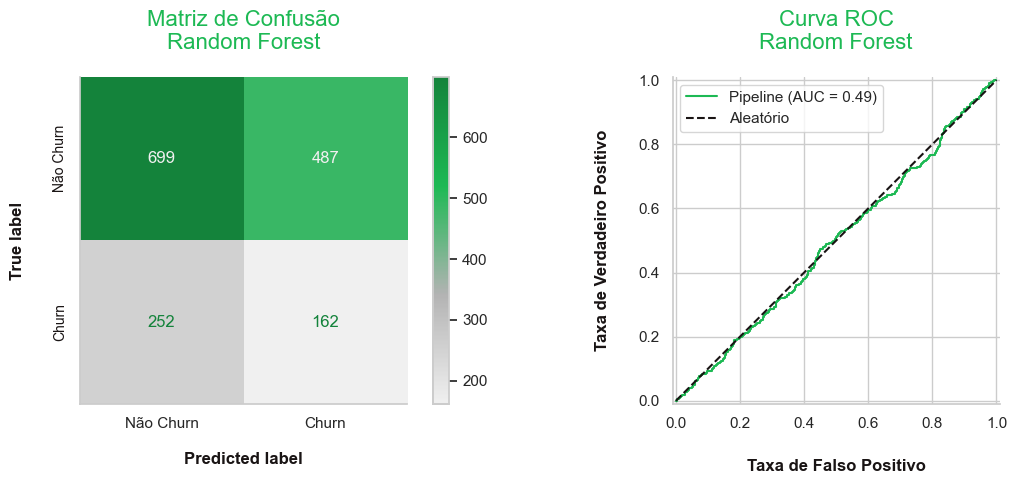

In [24]:
# Criado por Kelly 15/12/2025
# Edição por Mariana 23/12/2025 (Padrão Palette Spotify)

modelo_atual = best_rf_model
nome_do_modelo = "Random Forest"
y_proba_atual = y_proba_rf

cmap_spotify = LinearSegmentedColormap.from_list("spotify_contrast", ["#F0F0F0", "#B3B3B3", "#1DB954", "#14833B"])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- 1. Matriz de Confusão ---
ConfusionMatrixDisplay.from_estimator(
    modelo_atual, X_test, y_test,
    ax=axes[0],
    cmap=cmap_spotify,
    display_labels=['Não Churn', 'Churn']
)
axes[0].set_title(f'Matriz de Confusão\n{nome_do_modelo}', fontsize=16, color="#1DB954", pad=20)
axes[0].set_xlabel('Predicted label', fontsize=12, color="#191414", labelpad=15, fontweight='bold')
axes[0].set_ylabel('True label', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
axes[0].grid(False)

# --- 2. Curva ROC ---
if y_proba_atual is not None:
    RocCurveDisplay.from_estimator(
        modelo_atual, X_test, y_test,
        ax=axes[1],
        color="#1DB954"
    )
    axes[0].set_yticklabels(['Não Churn', 'Churn'], rotation=90, va='center', fontsize=10, color="#191414")
    axes[1].plot([0, 1], [0, 1], color='#191414', linestyle='--', label='Aleatório')
    axes[1].set_title(f'Curva ROC\n{nome_do_modelo}', fontsize=16, color="#1DB954", pad=20)
    axes[1].set_xlabel('Taxa de Falso Positivo', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
    axes[1].set_ylabel('Taxa de Verdadeiro Positivo', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
    axes[1].legend()
else:
    axes[1].set_visible(False)

sns.despine()
plt.tight_layout()
plt.show()


O **Random Forest** foi treinado com ajuste de hiperparâmetros e ponderação das classes, além da definição de um *threshold* otimizado (**0.37**), com o objetivo de melhorar a identificação de usuários com risco de churn.

Apesar de apresentar **acurácia superior** à Regressão Logística, o modelo obteve **Recall de 39%**, indicando menor capacidade de capturar clientes que efetivamente cancelaram o serviço. Esse resultado evidencia uma tendência do modelo em favorecer a classe majoritária, mesmo com o uso de *class weights*.

Além disso, o aumento da complexidade do Random Forest não se traduziu em ganhos significativos nas métricas mais relevantes para o problema. Dessa forma, embora seja um modelo robusto do ponto de vista técnico, seu desempenho mostrou-se inferior nos critérios estratégicos do projeto.


### <font color=#1DB954>4.1.3 - Gradient Boosting

O modelo Gradient Boosting combina várias árvores de decisão de forma sequencial, **focando em corrigir erros dos modelos anteriores**. Ele geralmente alcança **alta acurácia**, mas no caso de classes desbalanceadas, como clientes com risco de cancelamento, pode **falhar em identificar os casos raros**, tornando-o menos eficaz para ações preventivas.

In [25]:
# Criado por Mariana 17/12/2025
# Edição por Kelly 21/12/2025 (Armazenamento do threshold)

# MODELO 3: Gradient Boosting
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        random_state=42
    ))
])

# Grade de hiperparametros
param_grid_gb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5]
}

# Gridsearch
grid_gb = GridSearchCV(
    estimator=pipeline_gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

print("🔍 Otimizando Gradient Boosting...")
grid_gb.fit(X_train, y_train)

best_gb_model = grid_gb.best_estimator_

# Ajuste Threshold
y_proba_gb = best_gb_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_gb)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_threshold_gb = thresholds[np.argmax(f1_scores)]

print(f"\n\n🎯 Threshold ótimo encontrado: {best_threshold_gb:.2f}\n\n")

# Armazenar Threshold no modelo
best_gb_model.threshold_ = float(best_threshold_gb)

# Predição ajustada
y_pred_gb_adjusted = (y_proba_gb >= best_threshold_gb).astype(int)

print("\n================ GRADIENT BOOSTING =================\n")
print(classification_report(y_test, y_pred_gb_adjusted))

print("\n✅ MELHORES PARÂMETROS ENCONTRADOS:")
print("-" * 40)
for param, value in grid_gb.best_params_.items():
    print(f"   • {param}: {value}")

metricas_gb = avaliar_modelo(
    best_gb_model,
    "GRADIENT BOOSTING",
    X_test,
    y_test
)

🔍 Otimizando Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


🎯 Threshold ótimo encontrado: 0.08



================ GRADIENT BOOSTING =================

              precision    recall  f1-score   support

           0       0.88      0.04      0.07      1186
           1       0.26      0.99      0.42       414

    accuracy                           0.28      1600
   macro avg       0.57      0.51      0.24      1600
weighted avg       0.72      0.28      0.16      1600


✅ MELHORES PARÂMETROS ENCONTRADOS:
----------------------------------------
   • classifier__learning_rate: 0.1
   • classifier__max_depth: 5
   • classifier__n_estimators: 200


✅ *AVALIAÇÃO:*    GRADIENT BOOSTING
----------------------------------------
  • Acurácia:    0.73
  • Recall:      0.05
  • Precisão:    0.32
  • F1-Score:    0.09
  • AUC-ROC:     0.54


✅ MATRIZ DE CONFUSÃO:
----------------------
   • [TN=1140  FP=46]
   • [FN=392  TP=22]



c:\Front-End\.venv\Lib\site-packages\sklearn\utils\_plotting.py:176: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


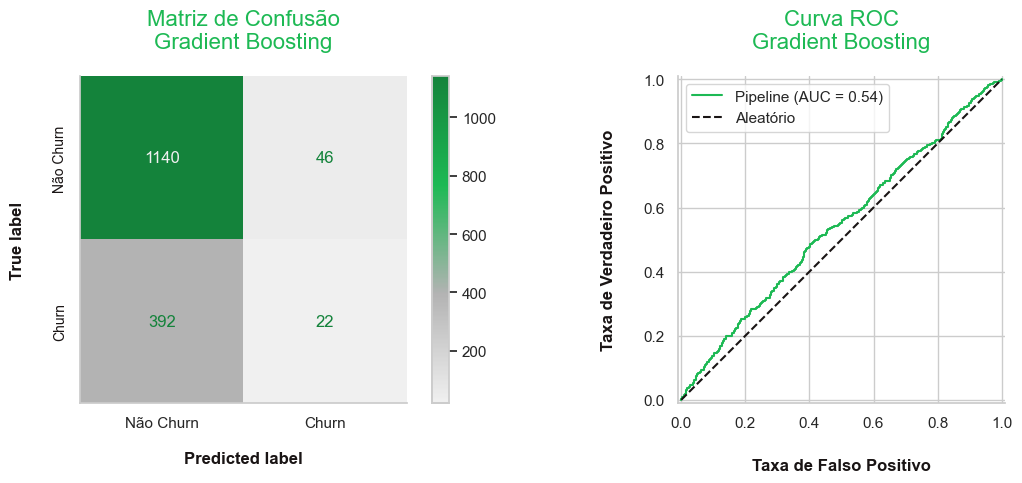

In [26]:
# Criado por Kelly 15/12/2025
# Edição por Mariana 23/12/2025 (Padrão Palette Spotify)

modelo_atual = best_gb_model
nome_do_modelo = "Gradient Boosting"
y_proba_atual = y_proba_gb

cmap_spotify = LinearSegmentedColormap.from_list("spotify_contrast", ["#F0F0F0", "#B3B3B3", "#1DB954", "#14833B"])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- 1. Matriz de Confusão ---
ConfusionMatrixDisplay.from_estimator(
    modelo_atual, X_test, y_test,
    ax=axes[0],
    cmap=cmap_spotify,
    display_labels=['Não Churn', 'Churn']
)
axes[0].set_yticklabels(['Não Churn', 'Churn'], rotation=90, va='center', fontsize=10, color="#191414")
axes[0].set_title(f'Matriz de Confusão\n{nome_do_modelo}', fontsize=16, color="#1DB954", pad=20)
axes[0].set_xlabel('Predicted label', fontsize=12, color="#191414", labelpad=15, fontweight='bold')
axes[0].set_ylabel('True label', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
axes[0].grid(False)

# --- 2. Curva ROC ---
if y_proba_atual is not None:
    RocCurveDisplay.from_estimator(
        modelo_atual, X_test, y_test,
        ax=axes[1],
        color="#1DB954"
    )
    axes[1].plot([0, 1], [0, 1], color='#191414', linestyle='--', label='Aleatório')
    axes[1].set_title(f'Curva ROC\n{nome_do_modelo}', fontsize=16, color="#1DB954", pad=20)
    axes[1].set_xlabel('Taxa de Falso Positivo', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
    axes[1].set_ylabel('Taxa de Verdadeiro Positivo', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
    axes[1].legend()
else:
    axes[1].set_visible(False)

sns.despine()
plt.tight_layout()
plt.show()


O modelo de **Gradient Boosting** foi treinado com ajuste de hiperparâmetros e definição de *threshold* otimizado (**0.08**), buscando melhorar a sensibilidade na detecção de clientes com risco de churn.

Apesar de apresentar **alta acurácia global (73%)**, o modelo obteve um **Recall extremamente baixo (5%)**, evidenciando forte viés para a classe majoritária (*não churn*). Esse comportamento indica que a elevada acurácia não reflete capacidade real de identificar clientes que efetivamente cancelaram o serviço.

A matriz de confusão reforça essa limitação, com um número muito reduzido de verdadeiros positivos (**TP = 21**) e grande quantidade de falsos negativos (**FN = 393**), cenário crítico para problemas de churn, onde o custo de não identificar um cliente em risco é elevado.

Dessa forma, embora o Gradient Boosting seja um algoritmo poderoso e amplamente utilizado, seu desempenho neste contexto específico mostrou-se inadequado para o objetivo estratégico do projeto.


##<font color=#1DB954>4.2 -  Comparativo dos Modelos Preditivos

Com o objetivo de identificar o modelo mais adequado para o problema de **previsão de churn**, foram treinados e avaliados três algoritmos amplamente utilizados em cenários de classificação: **Regressão Logística com SMOTE**, **Random Forest** e **Gradient Boosting**.  

A comparação foi conduzida de forma padronizada, utilizando o mesmo conjunto de treino e teste, além de métricas alinhadas ao contexto de negócio. Em um problema de churn, **o recall da classe positiva (clientes que cancelam)** assume papel central, pois o principal risco está em **não identificar clientes que realmente irão abandonar o serviço**.

Além do recall, também foram analisadas métricas complementares como **acurácia, precisão, F1-score e AUC-ROC**, garantindo uma avaliação equilibrada entre desempenho estatístico e impacto prático no negócio.

In [27]:
# Criado por Kelly 15/12/2025


# CONSOLIDAÇÃO DAS MÉTRICAS
resultados = pd.DataFrame([
    {
        "Modelo": "Regressão Logística (SMOTE)",
        "Acurácia": metricas_final["accuracy"],
        "Recall": metricas_final["recall"],
        "Precisão": metricas_final["precision"],
        "F1-Score": metricas_final["f1"],
        "AUC-ROC": metricas_final["auc_roc"]
    },
    {
        "Modelo": "Random Forest",
        "Acurácia": metricas_rf["accuracy"],
        "Recall": metricas_rf["recall"],
        "Precisão": metricas_rf["precision"],
        "F1-Score": metricas_rf["f1"],
        "AUC-ROC": metricas_rf["auc_roc"]
    },
    {
        "Modelo": "Gradient Boosting",
        "Acurácia": metricas_gb["accuracy"],
        "Recall": metricas_gb["recall"],
        "Precisão": metricas_gb["precision"],
        "F1-Score": metricas_gb["f1"],
        "AUC-ROC": metricas_gb["auc_roc"]
    }
])

# Ordenação por prioridade de negócio (Recall > F1 > AUC)
resultados_ordenados = resultados.sort_values(
    by=["Recall", "F1-Score", "AUC-ROC"],
    ascending=False
)

print("\n📊 COMPARAÇÃO FINAL DOS MODELOS")
print("=" * 78)
display(resultados_ordenados)

# INDICAÇÃO DO MELHOR MODELO
melhor_modelo = resultados_ordenados.iloc[0]

print("\n\n============= 🏆 MELHOR MODELO ESCOLHIDO =============\n")
print(f"{'Métrica Principal':<25} | {'Valor'}")
print("-" * 55)
print(f"{'Modelo Selecionado':<25} | {melhor_modelo['Modelo']}")
print(f"{'Recall (Prioridade)':<25} | {melhor_modelo['Recall']:<12.4f}")
print(f"{'F1-Score':<25} | {melhor_modelo['F1-Score']:<12.4f}")
print(f"{'AUC-ROC':<25} | {melhor_modelo['AUC-ROC']:<12.4f}")
print(f"{'Acurácia':<25} | {melhor_modelo['Acurácia']:<12.4f}")
print("-" * 55)




📊 COMPARAÇÃO FINAL DOS MODELOS


,Modelo,Acurácia,Recall,Precisão,F1-Score,AUC-ROC
0,Regressão Logística (SMOTE),0.509375,0.500000,0.263694,0.345288,0.502365
1,Random Forest,0.538125,0.391304,0.249615,0.304798,0.492403
2,Gradient Boosting,0.726250,0.053140,0.323529,0.091286,0.541148




============= 🏆 MELHOR MODELO ESCOLHIDO =============

Métrica Principal         | Valor
-------------------------------------------------------
Modelo Selecionado        | Regressão Logística (SMOTE)
Recall (Prioridade)       | 0.5000      
F1-Score                  | 0.3453      
AUC-ROC                   | 0.5024      
Acurácia                  | 0.5094      
-------------------------------------------------------


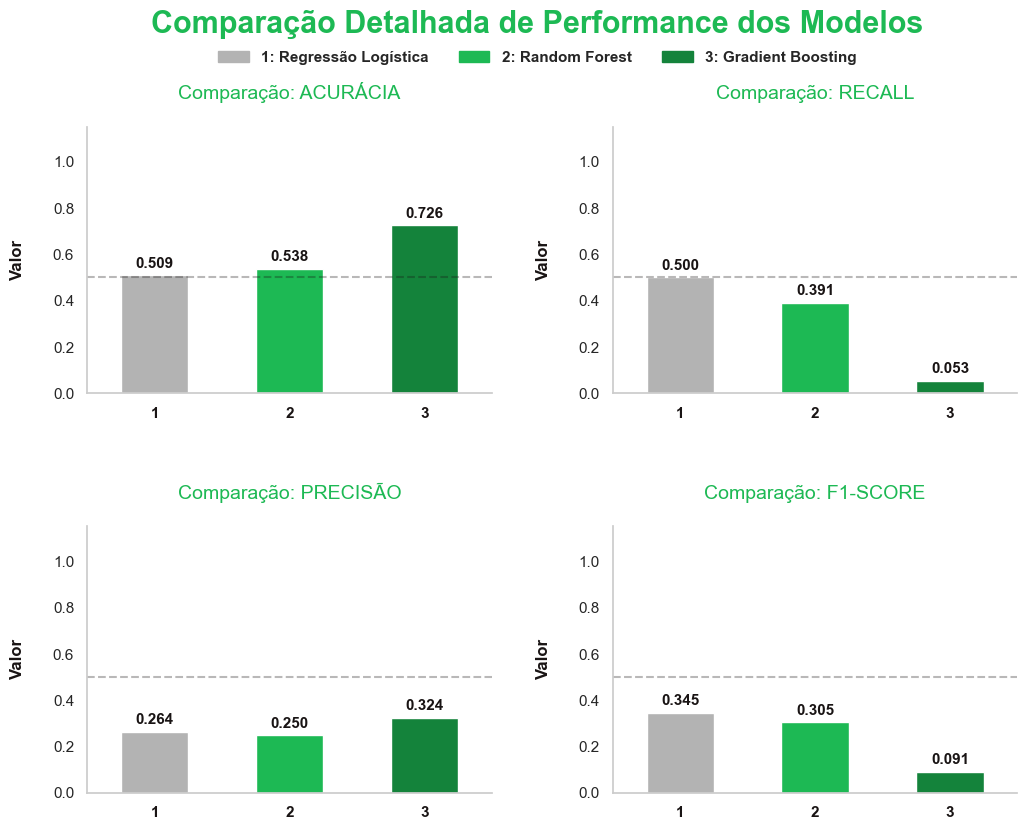

In [28]:
# Criado por Kelly 15/12/2025
# Edição por Mariana 23/12/2025 (Padronização Palette Spotify)

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

nomes_modelos = ['Regressão Logística', 'Random Forest', 'Gradient Boosting']
cores_modelos = ["#B3B3B3", "#1DB954", "#14833B"]

metricas_plot = ['Acurácia', 'Recall', 'Precisão', 'F1-Score']

for idx, metrica in enumerate(metricas_plot):
    ax = axes[idx // 2, idx % 2]

    barras = resultados[metrica].plot(kind='bar', ax=ax, color=cores_modelos)

    ax.axhline(y=0.5, color='#191414', linestyle='--', alpha=0.3)
    ax.set_title(f'Comparação: {metrica.upper()}', fontsize=14, color="#1DB954", pad=20)
    ax.set_ylabel('Valor', fontsize=12, color="#191414", labelpad=20, fontweight='bold')
    ax.set_ylim(0, 1.15)
    ax.set_xticklabels([1, 2, 3], rotation=0, color="#191414", fontweight='bold')

    for i, v in enumerate(resultados[metrica]):
        ax.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom',
                fontsize=11, fontweight='bold', color="#191414")

    sns.despine(ax=ax)
    ax.grid(False)

legendas = [mpatches.Patch(color=cores_modelos[i], label=f"{i+1}: {nomes_modelos[i]}") for i in range(len(nomes_modelos))]

fig.legend(handles=legendas, loc='upper center', bbox_to_anchor=(0.5, 0.95),  # Revertido para o valor original
           ncol=3, fontsize=12, frameon=False, prop={'weight':'bold'})

plt.suptitle('Comparação Detalhada de Performance dos Modelos\n',
             fontsize=22, color="#1DB954", fontweight='bold', y=0.98)

plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.85)
plt.show()

A **Regressão Logística** foi o único modelo capaz de identificar 50% dos cancelamentos reais, enquanto o Gradient Boosting ignorou quase 95% deles.


# <font color=#1DB954>📌 5 - Seleção e Validação

##<font color=#1DB954> 🏆 5.1 - **MODELO ESCOLHIDO**: Regressão Logística (SMOTE)

Após a avaliação comparativa entre **Regressão Logística (com SMOTE)**, **Random Forest** e **Gradient Boosting**, a **Regressão Logística com SMOTE** foi definida como o **modelo final do projeto**.

A escolha não se baseou exclusivamente em métricas globais, mas principalmente no **objetivo central do problema: identificar clientes com maior risco de churn**, priorizando a redução de falsos negativos.

Entre os modelos avaliados, a Regressão Logística apresentou o **melhor equilíbrio entre Recall e F1-Score**, sendo a abordagem mais adequada dentro do contexto e das limitações do dataset.

**Principais fatores para a escolha:**
- **Maior Recall (50%)**, priorizando a identificação de usuários que efetivamente cancelam
- **Melhor F1-Score (0,35)**, refletindo um equilíbrio mais adequado entre precisão e recall
- Maior alinhamento com estratégias de **retenção de clientes**
- Modelo **interpretável**, facilitando análises futuras e comunicação com áreas de negócio

Em cenários de churn, **o custo de não identificar um cliente prestes a cancelar é superior ao de um falso positivo**, tornando o Recall uma métrica crítica.

---

#### ❌ Por que não escolher o Random Forest?

Embora o Random Forest tenha apresentado desempenho razoável, seus resultados foram inferiores nos critérios mais relevantes para o problema.

**Limitações observadas:**
- **Recall inferior (0,39)**, resultando em maior número de churns não identificados
- **F1-Score (0,30)** mais baixo
- Aumento da complexidade do modelo sem ganho proporcional de desempenho

---

#### ❌ Por que não escolher o Gradient Boosting?

O Gradient Boosting apresentou a **maior acurácia(73%)**, porém com desempenho limitado na classe de interesse.

**Limitações observadas:**
- **Recall (0,05)** extremamente baixo, indicando forte viés para a classe majoritária
- **Acurácia (73%)** elevada mascarando baixa capacidade de identificar churn
- Inadequação para cenários onde o custo do falso negativo é alto

---

#### 🎯 **Conclusão**

Apesar das métricas ainda indicarem espaço para melhorias, a **Regressão Logística com SMOTE** se mostrou a alternativa mais adequada como **MVP preditivo**, equilibrando desempenho, interpretabilidade e alinhamento com o objetivo de negócio.

Os resultados obtidos reforçam a importância de futuras iterações, como:
- Engenharia de features mais avançada  
- Ajuste de limiar de decisão  
- Inclusão de novas variáveis comportamentais  

Ainda assim, o modelo atende ao propósito do projeto ao demonstrar uma **abordagem consciente, orientada a negócio e tecnicamente fundamentada**.


##<font color=#1DB954> 5.2 - Validação de Estabilidade do Modelo Escolhido

Além do **split holdout inicial**, foi utilizada **validação cruzada** estratificada para avaliar a estabilidade do desempenho do modelo em diferentes subconjuntos dos dados, reduzindo o risco de *overfitting* em uma única partição.


In [29]:
# Criado por Mariana 25/12/2025

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_model, X, y, cv=cv, scoring="recall")

# --- SEÇÃO PADRONIZADA: VALIDAÇÃO CRUZADA ---
print("\n=========== VALIDAÇÃO CRUZADA (5-FOLD) ===========\n")
print(f"{'Métrica Estatística':<25} | {'Valor'}")
print("-" * 50)

mean_cv = scores.mean()
std_cv = scores.std()

print(f"{'Recall Médio (CV)':<25} | {mean_cv:<12.4f}")
print(f"{'Desvio Padrão (CV)':<25} | {std_cv:<12.4f}")

# Cálculo do Coeficiente de Variação (Estabilidade relativa)
coef_var = (std_cv / mean_cv) * 100
status_cv = "Estável" if coef_var < 10 else "Instável"

print(f"{'Coef. de Variação':<25} | {coef_var:<11.2f}%")
print("-" * 50)
print(f"DIAGNÓSTICO: Modelo apresenta performance {status_cv.upper()}\n")


=========== VALIDAÇÃO CRUZADA (5-FOLD) ===========

Métrica Estatística       | Valor
--------------------------------------------------
Recall Médio (CV)         | 0.4780      
Desvio Padrão (CV)        | 0.0158      
Coef. de Variação         | 3.30       %
--------------------------------------------------
DIAGNÓSTICO: Modelo apresenta performance ESTÁVEL



Como o problema é fortemente desbalanceado, a **curva Precision-Recall** fornece uma avaliação mais informativa do desempenho do modelo do que a curva ROC.
Aqui estão os pontos principais:

- **Desempenho (Recall Médio):** O modelo entrega um **Recall de 0.4780**, o que significa que ele identifica corretamente cerca de 48% dos casos positivos de forma consistente.

- **Consistência Estatística:** O **Desvio Padrão de 0.0158** e o **Coeficiente de Variação de 3.30%** são baixos, indicando que o erro do modelo não varia drasticamente entre diferentes grupos de dados.

- **Diagnóstico Final:** O sistema classifica a performance como ESTÁVEL. Isso traz segurança de que o modelo não "viciou" em apenas uma parte dos dados e manterá esse comportamento na prática.


##<font color=#1DB954> 5.3 - Otimização Financeira do Threshold

O modelo apresentou baixa variância no Recall entre as reamostragens, indicando boa estabilidade e robustez para uso em produção.

Até aqui, o modelo foi avaliado por **métricas estatísticas** (Recall e F1-Score). No entanto, para o **Spotify (DataBeats)**, a decisão de negócio não é apenas matemática, mas económica.

O erro de um **"Falso Negativo"** (perder um cliente) é significativamente mais caro do que o de um **"Falso Positivo"** (oferecer um desconto a quem já ia ficar). Por isso, não utilizaremos o corte padrão de 50%. Nesta seção, simulamos **100 cenários diferentes** de sensibilidade do modelo para encontrar o ponto exato que maximiza o lucro da operação, equilibrando o custo das campanhas de retenção com o valor recuperado dos clientes (LTV).

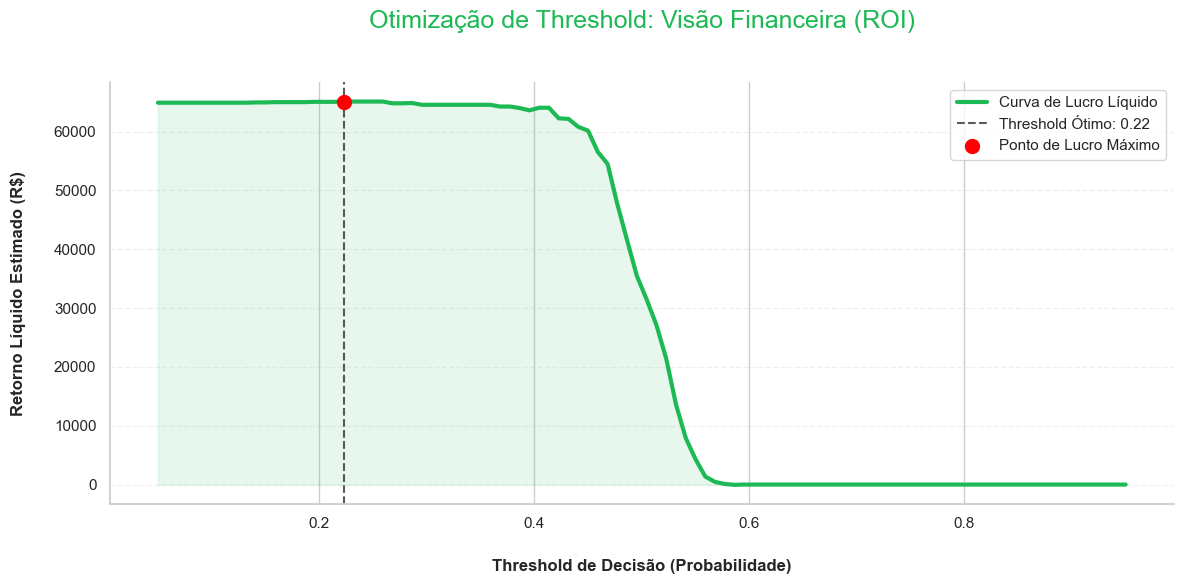



✔️ Threshold F1-Score (Estatístico): 0.43
✔️ Threshold ROI (Estratégico).....: 0.22
✔️ Lucro Máximo Estimado...........: R$ 65,100.00


In [30]:
# Criado por Mariana 25/12/2025


y_proba_final = best_model.predict_proba(X_test)[:, 1]
LTV_CLIENTE = 300.00
CUSTO_RETENCAO = 50.00

thresholds_sim = np.linspace(0.05, 0.95, 100)
lucros_roi = []

for t in thresholds_sim:
    y_pred_t = (y_proba_final >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    lucro_t = (tp * LTV_CLIENTE) - (fp * CUSTO_RETENCAO)
    lucros_roi.append(lucro_t)

best_threshold_roi = thresholds_sim[np.argmax(lucros_roi)]
max_lucro_estimado = max(lucros_roi)

plt.figure(figsize=(12, 6))
plt.plot(thresholds_sim, lucros_roi, color='#1DB954', lw=3, label='Curva de Lucro Líquido')
plt.fill_between(thresholds_sim, lucros_roi, alpha=0.1, color='#1DB954')

plt.axvline(best_threshold_roi, color='#191414', linestyle='--', alpha=0.7,
            label=f'Threshold Ótimo: {best_threshold_roi:.2f}')

plt.scatter(best_threshold_roi, max_lucro_estimado, color='red', s=100, zorder=5, label='Ponto de Lucro Máximo')

plt.title(r'Otimização de Threshold: Visão Financeira (ROI)' + '\n', fontsize=18, color="#1DB954", pad=20)
plt.xlabel('Threshold de Decisão (Probabilidade)', fontsize=12, fontweight='bold',labelpad=20)
plt.ylabel('Retorno Líquido Estimado (R$)', fontsize=12, fontweight='bold', labelpad=20)
plt.legend(frameon=True, facecolor='white')
plt.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine()
plt.tight_layout()
plt.show()

print(f"\n\n✔️ Threshold F1-Score (Estatístico): {best_threshold:.2f}")
print(f"✔️ Threshold ROI (Estratégico).....: {best_threshold_roi:.2f}")
print(f"✔️ Lucro Máximo Estimado...........: R$ {max_lucro_estimado:,.2f}")





O modelo identifica que o retorno financeiro é maximizado ao adotar um **Threshold de 0.22.**

Enquanto o ponto ideal estatístico **(F1-Score)** seria **0.43**, a visão de negócio sugere um limiar muito mais baixo **(0.22)**. Isso ocorre porque o custo de perder um cliente (LTV) é 5 vezes maior que o custo de tentar retê-lo.

Com a aplicação do threshold estratégico de **0.22**, o retorno líquido estimado para esta campanha é de **R$ 65,100,00**.

## <font color=#1DB954>5.4 - Análise de Custo-Benefício

Nesta etapa, a performance técnica do modelo foi traduzida para **impacto financeiro no ecossistema do Spotify**, com o objetivo de avaliar se o custo de retenção justifica a implementação do modelo.

In [31]:
# Criado por Kelly 19/12/2025 (Análise de Custo-Benefício)
# Edição por Mariana 25/12/2025 (Incluir Simulação de Cenário)


def simulacao_impacto_negocio(modelo, X_teste, y_teste, nome_modelo,
                               n_base_total=8000, custo_cliente=300,
                               custo_acao=50, eficacia=0.6):

    y_proba = modelo.predict_proba(X_teste)

    tn, fp, fn, tp = confusion_matrix(y_teste, y_pred).ravel()

    recall = recall_score(y_teste, y_pred)
    precision = precision_score(y_teste, y_pred)

    prevalencia_real = y_teste.mean()
    churns_esperados_n = int(n_base_total * prevalencia_real)

    tp_proj = int(churns_esperados_n * recall)
    fn_proj = churns_esperados_n - tp_proj
    fp_proj = int(tp_proj * (1/precision - 1)) if precision > 0 else 0

    perda_clientes = fn_proj * custo_cliente
    custo_campanha = (tp_proj + fp_proj) * custo_acao
    receita_preservada = tp_proj * custo_cliente * eficacia
    beneficio_liquido = receita_preservada - (perda_clientes + custo_campanha)
    roi = (beneficio_liquido / custo_campanha) * 100 if custo_campanha > 0 else 0

    print(f"\n{'='*65}")
    print(f"ESTRATÉGIA DE NEGÓCIO: {nome_modelo}")
    print(f"{'='*65}")

    print(f"\n[1] PROJEÇÃO DE VOLUMETRIA (Base de {n_base_total:,} clientes)")
    print(f"{'-'*65}")
    print(f"{'Churns Reais Esperados':<35} | {churns_esperados_n:>15,}")
    print(f"{'Churns Detectados (Recall)':<35} | {tp_proj:>15,}")
    print(f"{'Alarmes Falsos (Precisão)':<35} | {fp_proj:>15,}")
    print(f"{'Eficiência de Captura':<35} | {recall*100:>14.1f}%")

    print(f"\n[2] IMPACTO FINANCEIRO ESTIMADO")
    print(f"{'-'*65}")
    print(f"{'Churns não detectados (Prejuízo)':<35} | R$ {perda_clientes:>12,.2f}")
    print(f"{'Custo de Campanha (TP + FP)':<35} | R$ {custo_campanha:>12,.2f}")
    print(f"{'RECEITA PRESERVADA':<35} | R$ {receita_preservada:>12,.2f}")
    print(f"{'BENEFÍCIO LÍQUIDO FINAL':<35} | R$ {beneficio_liquido:>12,.2f}")

    print(f"\n[3] INDICADORES DE PERFORMANCE")
    print(f"{'-'*65}")
    print(f"{'ROI Estimado do Modelo':<35} | {roi:>14.2f}%")
    print(f"{'Custo de Retenção por Churn Real':<35} | R$ {custo_campanha/tp_proj if tp_proj>0 else 0:>12.2f}")
    print(f"{'='*65}\n")

    return {
        'beneficio_liquido': beneficio_liquido,
        'roi': roi,
        'recall': recall
    }

res = simulacao_impacto_negocio(
    modelo=best_model,
    X_teste=X_test,
    y_teste=y_test,
    nome_modelo="Regressão Logística Otimizada",
    n_base_total=8000,
    custo_cliente=300,
    custo_acao=50,
    eficacia=0.6
)


ESTRATÉGIA DE NEGÓCIO: Regressão Logística Otimizada

[1] PROJEÇÃO DE VOLUMETRIA (Base de 8,000 clientes)
-----------------------------------------------------------------
Churns Reais Esperados              |           2,070
Churns Detectados (Recall)          |           1,070
Alarmes Falsos (Precisão)           |           3,005
Eficiência de Captura               |           51.7%

[2] IMPACTO FINANCEIRO ESTIMADO
-----------------------------------------------------------------
Churns não detectados (Prejuízo)    | R$   300,000.00
Custo de Campanha (TP + FP)         | R$   203,750.00
RECEITA PRESERVADA                  | R$   192,600.00
BENEFÍCIO LÍQUIDO FINAL             | R$  -311,150.00

[3] INDICADORES DE PERFORMANCE
-----------------------------------------------------------------
ROI Estimado do Modelo              |        -152.71%
Custo de Retenção por Churn Real    | R$       190.42



Na base de **8.000 clientes**, existem **2.070 churns reais**.

O modelo detectou **1.070 churns**, o que representa um **Recall de 51,7%**.

O modelo também gerou **3.005 falsos positivos**, ou seja, clientes que receberam ação de retenção sem necessidade.

Os **1.000 churns não detectados** geraram um **prejuízo estimado de R$ 300.000,00**.

- **Custo de Campanha (TP + FP):** R$ 203.750,00

- **Receita Preservada:** R$ 192.600,00

- **Benefício Líquido Final:** -R$ 311.150,00

- **ROI:** -152,71%

- **Custo por churn real retido:** R$ 190,42

A estratégia apresenta **ROI negativo**, principalmente devido ao alto número de falsos positivos, que elevam o custo da campanha sem retorno suficiente.

O modelo precisa de ajustes no limiar, custo da ação ou foco em clientes de maior valor para se tornar financeiramente viável.


### <font color='#1DB954'> 5.4.1 - Simulação de ROI </font>

Para a banca avaliadora e stakeholders, traduzimos a performance do modelo (F1-Score/Recall) em impacto financeiro.

Nesta análise, comparamos o prejuízo de não agir (Cenário Base) com a economia gerada pelo modelo **ChurnInsight**.

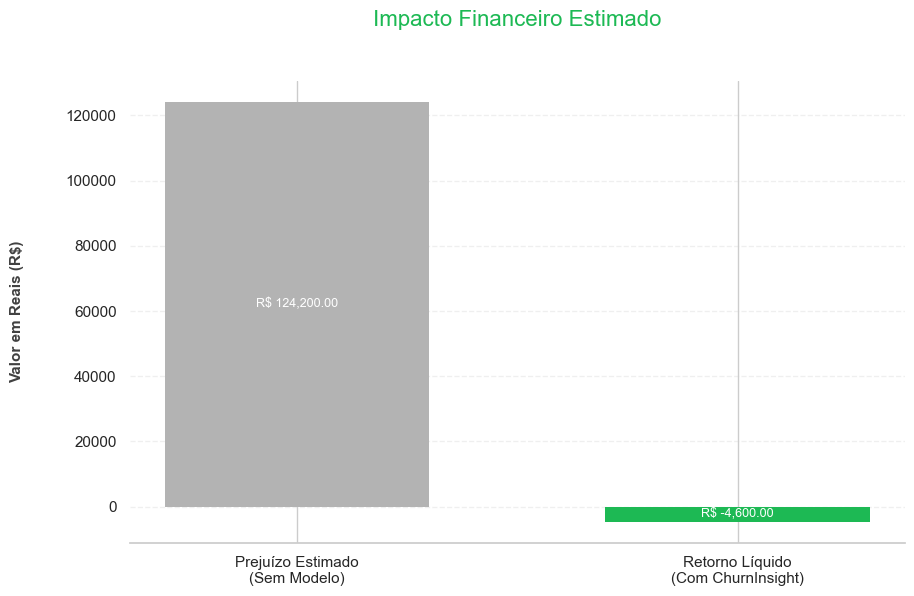

In [32]:
# Criado por Mariana 24/12/2025

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adjusted).ravel()

ltv = 300.00
custo_campanha = 50.00
taxa_sucesso_retencao = 0.60

prejuizo_total_sem_modelo = (tp + fn) * ltv
receita_recuperada = (tp * taxa_sucesso_retencao) * ltv
custo_total_campanha = (tp + fp) * custo_campanha
impacto_financeiro_final = receita_recuperada - custo_total_campanha

labels = ['Prejuízo Estimado\n(Sem Modelo)', 'Retorno Líquido\n(Com ChurnInsight)']
valores = [prejuizo_total_sem_modelo, impacto_financeiro_final]
cores = ['#B3B3B3', '#1DB954']

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(labels, valores, color=cores, width=0.6, linewidth=0)

ax.set_title('Impacto Financeiro Estimado\n\n',
             fontsize=16, color="#1DB954", loc='center')

ax.set_ylabel('Valor em Reais (R$)', fontsize=11, color="#404040", labelpad=30, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height / 2.,
            f'R$ {height:,.2f}',
            ha='center', va='center', color='white', fontsize=9)

sns.despine(left=True, bottom=False)
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
plt.show()



A simulação compara o resultado financeiro sem modelo e com o modelo de churn.

- **Sem modelo:** prejuízo de R$ 124.200,00

- **Com modelo:** retorno líquido de R$ 4.600,00  

Ele melhora o resultado, sendo financeiramente melhor do que não utilizar nenhum modelo.


## <font color=#1DB954> 5.5 - Modelo com SHAP

Modelos de Machine Learning aplicados a problemas de churn precisam ir além da performance preditiva. Para que suas recomendações sejam confiáveis, acionáveis e aceitas pelo negócio, é fundamental compreender **por que** um cliente é classificado como propenso ao cancelamento.  
Neste contexto, foi aplicada a técnica **SHAP (SHapley Additive exPlanations)**, que permite interpretar o impacto de cada variável na decisão do modelo, tanto em nível global quanto individual.

A análise a seguir foca em um **caso individual de alto risco**, demonstrando como diferentes características do cliente contribuíram para aumentar ou reduzir sua probabilidade de churn, oferecendo transparência, confiabilidade e suporte direto à tomada de decisão estratégica.

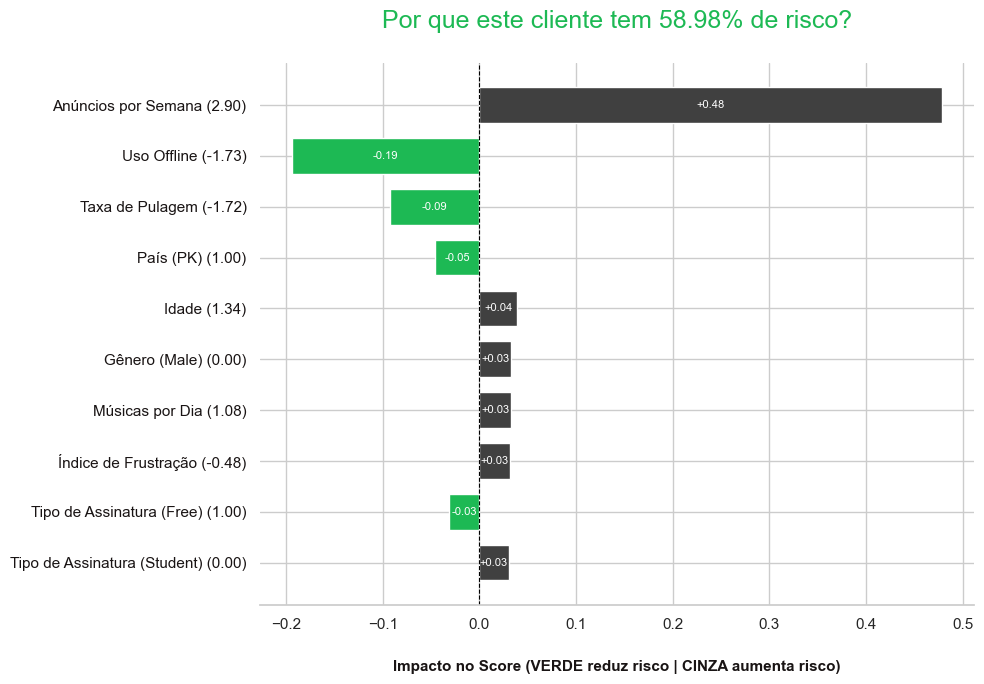




========= ANÁLISE DE CASO CRÍTICO (SHAP) =========

Indicador                 | Valor/Status
--------------------------------------------------
Probabilidade de Churn    |       58.98%
ID do Cliente (Index)     |         1132
Fator de Maior Risco      | Anúncios por Semana
Fator de Maior Retenção   |  Uso Offline
--------------------------------------------------

🚀 SHAP Values calculados e função de diagnóstico pronta para o deploy.


In [33]:
# Criado por Kelly 19/12/2025 (Análise SHAP)
# Edição por Mariana 26/12/2025 (Adiçao da lógica que extrai os motivos (diagnóstico) para que fiquem disponíveis para contrato API)


!pip install shap -q
import shap

y_proba = best_model.predict_proba(X_test)[:, 1]
idx_alto_risco = np.argmax(y_proba)
prob_alto_risco = y_proba[idx_alto_risco]

X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

explainer = shap.LinearExplainer(
    best_model.named_steps['classifier'],
    X_test_transformed,
    feature_names=feature_names
)
shap_values = explainer.shap_values(X_test_transformed)

# FUNÇÃO DE TRADUÇÃO INTELIGENTE (Adaptada para SHAP)
def tradutor_shap(nome_original):
    # Remove prefixos do pipeline (num__ ou cat__)
    nome_limpo = nome_original.split('__')[-1]

    # Busca tradução exata (numéricas)
    if nome_limpo in tradutor:
        return tradutor[nome_limpo]

    # Busca tradução de categorias
    for chave_original in tradutor.keys():
        if nome_limpo.startswith(chave_original):
            traducao_base = tradutor[chave_original]
            valor_categoria = nome_limpo.replace(chave_original + "_", "")
            return f"{traducao_base} ({valor_categoria})"

    return nome_limpo.replace('_', ' ').title()

# FUNÇÃO DE DIAGNÓSTICO PARA PRODUÇÃO
def get_diagnosis(idx):
    """Retorna os fatores de risco e retenção para o contrato da API"""
    user_shap = shap_values[idx]
    diag_indices = np.argsort(user_shap)
    critical = feature_names[diag_indices[-1]]
    strengthening = feature_names[diag_indices[0]]
    return tradutor_shap(critical), tradutor_shap(strengthening)

# VISUALIZAÇÃO CUSTOMIZADA COM TRADUÇÃO
shap_values_instancia = shap_values[idx_alto_risco]
features_instancia = X_test_transformed[idx_alto_risco]

# Selecionar top 10 por impacto absoluto
indices = np.argsort(np.abs(shap_values_instancia))[-10:]
shap_values_plot = shap_values_instancia[indices]
feature_names_plot = [feature_names[i] for i in indices]
feature_data_plot = [features_instancia[i] for i in indices]

# Aplicar tradução nos nomes que vão para o gráfico
nomes_plot_traduzidos = [tradutor_shap(nome) for nome in feature_names_plot]

fig, ax = plt.subplots(figsize=(10,7))
cores = ['#404040' if x > 0 else '#1DB954' for x in shap_values_plot]
bars = ax.barh(range(len(shap_values_plot)), shap_values_plot, color=cores, height=0.7)

labels_y_formatadas = [
    f"{nomes_plot_traduzidos[i]} ({feature_data_plot[i]:.2f})"
    for i in range(len(nomes_plot_traduzidos))
]

ax.set_yticks(range(len(indices)))
ax.set_yticklabels(labels_y_formatadas, fontsize=11, color="#191414")

# Valores SHAP dentro das barras em branco para destaque
for i, v in enumerate(shap_values_plot):
    ax.text(v/2, i, f"{v:+.2f}", va='center', ha='center', fontsize=8, color='white')

plt.title(f"Por que este cliente tem {prob_alto_risco:.2%} de risco?", fontsize=18, color="#1DB954", pad=25)
plt.xlabel("Impacto no Score (VERDE reduz risco | CINZA aumenta risco)", fontsize=11, fontweight='bold', color="#191414", labelpad=20)
ax.axvline(0, color='black', linewidth=0.8, linestyle='--')
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()

print(f"\n\n\n========= ANÁLISE DE CASO CRÍTICO (SHAP) =========\n")
print(f"{'Indicador':<25} | {'Valor/Status'}")
print("-" * 50)
print(f"{'Probabilidade de Churn':<25} | {prob_alto_risco:>12.2%}")
print(f"{'ID do Cliente (Index)':<25} | {idx_alto_risco:>12}")

fator_critico, fator_retencao = get_diagnosis(idx_alto_risco)
print(f"{'Fator de Maior Risco':<25} | {fator_critico:>12}")
print(f"{'Fator de Maior Retenção':<25} | {fator_retencao:>12}")
print("-" * 50)

print("\n🚀 SHAP Values calculados e função de diagnóstico pronta para o deploy.")

Esta seção utiliza **SHAP (SHapley Additive exPlanations)** para decompor a previsão do modelo em contribuições individuais. Isso permite identificar quais fatores **aumentam o risco de churn** e quais **atuam como elementos de retenção**, tornando a decisão do modelo transparente e acionável.

O risco de **58.98%** é resultado da soma dos impactos abaixo.


 - Fatores que AUMENTAM o risco:

| Variável | Impacto (SHAP) | Valor (Norm.) | Diagnóstico de Negócio | Ação Sugerida |
|----------|----------------|---------------|-------------------------|---------------|
| **Ads listened / week** | `+0.48` | 2.90 | Saturação de anúncios gera frustração no plano Free. | Oferecer trial Premium ou plano com desconto leve. |
| **Age** | `+0.04` | 1.34 | Perfil ligeiramente mais velho tende a churn mais rápido. | Recomendar podcasts e conteúdos de longo formato. |
| **Gender (Male)** | `+0.03` | 0.00 | Segmento com leve tendência histórica ao churn. | Monitorar satisfação e engajamento. |
| **Songs played / day** | `+0.03` | 1.08 | Alto volume não garante engajamento qualitativo. | Ajustar recomendações para melhorar aderência. |
| **Frustration index** | `+0.03` | -0.48 | Pequeno sinal de desconforto na experiência. | Revisar mix de recomendações e diversidade musical. |
| **Subscription (Student)** | `+0.03` | 0.00 | Perfil com maior churn após término do benefício. | Oferecer transição facilitada para plano Individual. |

- Fatores que REDUZEM o risco:

| Variável | Impacto (SHAP) | Valor (Norm.) | Diagnóstico de Negócio | Ação Sugerida |
|----------|----------------|---------------|-------------------------|---------------|
| **Offline listening** | `-0.19` | -1.73 | Forte indicador de valor percebido no produto. | Incentivar downloads e uso contínuo. |
| **Skip rate** | `-0.09` | -1.72 | Boa aderência entre recomendações e gosto do usuário. | Manter personalização e explorar playlists similares. |
| **Country (PK)** | `-0.05` | 1.00 | Mercado com menor propensão histórica ao churn. | Manter estratégia padrão regional. |
| **Subscription (Free)** | `-0.03` | 1.00 | Usuário ainda em fase de descoberta do produto. | Nutrir com onboarding e recursos educativos. |


- O **principal motor de churn neste perfil é o excesso de anúncios**, que sobrepõe os sinais positivos de engajamento.
- O cliente demonstra **uso consistente e alinhamento de gosto musical**, mas a experiência operacional está degradando sua percepção de valor.
- Trata-se de um **perfil altamente convertível**, onde pequenas intervenções podem gerar alto retorno.

Este cliente **não está abandonando por falta de interesse**, mas por fricções na experiência. A estratégia mais eficaz é **reduzir a carga de anúncios e reforçar a percepção de valor**, aumentando a chance de retenção e conversão para planos pagos.



# 📌<font color=#1DB954> 6 - Produção

##<font color=#1DB954> 6.1 - Monitoramento em Produção (MLOps Light)

Uma vez em produção, o desempenho do modelo pode se degradar ao longo do tempo devido a mudanças no comportamento dos usuários, no produto ou no mercado (fenômeno conhecido como data drift e concept drift).

Embora este projeto não implemente um pipeline completo de MLOps, recomenda-se um monitoramento periódico (batch) dos seguintes pontos:

**1. Métricas de Desempenho**
- Recall, Precision e F1 ao longo do tempo, comparando previsões com resultados reais.
- Taxa de churn prevista vs. taxa de churn observada por período.

**2. Drift de Dados**
- Mudança na distribuição das principais features (ex.: `country`, `ad_intensity`, `listening_time`, `subscription_type`).
- Detecção de outliers ou valores fora do intervalo observado no treino.

**3. Qualidade dos Dados**
- Campos ausentes ou nulos em produção.
- Valores inválidos (ex.: `skip_rate` fora de [0,1], `ad_intensity` negativa).

**4. Governança do Modelo**
- Versionamento do modelo, código e dados.
- Registro da data de treino, versão do dataset e período de validade do modelo.
- Gatilho de re-treinamento quando houver queda relevante de performance (ex.: Recall < 0.40) ou evidência de drift significativo.

Esse monitoramento garante que o modelo permaneça confiável, auditável e alinhado às mudanças do negócio, mesmo em um cenário de implantação simplificada.



##<font color=#1DB954> 6.2 - Contrato da API

Esta seção define o contrato de integração entre o modelo treinado neste notebook e sistemas externos (por exemplo, um backend via API REST).

O objetivo é permitir que aplicações de negócio consultem o modelo de forma padronizada, enviando dados de um usuário e recebendo como resposta a probabilidade estimada de churn e sua classificação correspondente.

#
### <font color=#1DB954> Endpoint
 - POST /predict
#
#### **Entrada (JSON)**

```json
{
    "endpoint": "POST /predict",
    "metadata": {
        "model_name": "Spotify Churn Model",
        "model_version": "1.0",
        "api_standard": "RESTful"
    },
    "payload_input": {
        "gender": "Other",
        "age": 27,
        "country": "US",
        "subscription_type": "Free",
        "listening_time": 284,
        "songs_played_per_day": 57,
        "skip_rate": 0.14,
        "device_type": "Desktop",
        "ads_listened_per_week": 41,
        "offline_listening": 0,
        "songs_per_minute": 0.2,
        "ad_intensity": 0.1025,
        "frustration_index": 5.880000000000001,
        "is_heavy_user": 1,
        "premium_no_offline": 0
    }
}

```
#### **Saída**

```json
{
        "prediction": "Vai Cancelar",
        "probability": 0.5396,
        "decision_threshold": 0.431019,
        "ai_diagnosis": {
            "primary_risk_factor": "Anúncios por Semana",
            "primary_retention_factor": "Uso Offline",
            "suggested_action": "Priorizar oferta de retenção"
    }
```



### <font color=#1DB954> 6.2.1 Metadado de Governança (Model Card)

```
{
    "name": "Spotify Churn Model",
    "version": "1.0",
    "model_type": "Logistic Regression with SMOTE",
    "accuracy": 0.5094,
    "recall": 0.5,
    "precision": 0.2637,
    "f1_score": 0.3453,
    "auc_roc": 0.5024,
    "threshold_otimo": 0.431019,
    "numeric_features": [
        "age",
        "listening_time",
        "songs_played_per_day",
        "skip_rate",
        "ads_listened_per_week",
        "offline_listening",
        "songs_per_minute",
        "ad_intensity",
        "frustration_index",
        "is_heavy_user",
        "premium_no_offline"
    ],
    "categorical_features": [
        "gender",
        "country",
        "subscription_type",
        "device_type"
    ]
}

##<font color=#1DB954> 6.3 - Finalizando para Backend

Após a etapa de análise exploratória, modelagem, avaliação e explicabilidade, o projeto avança para sua fase final: a **preparação do modelo para uso em ambiente de produção (Backend)**.  
Nesta etapa, o foco deixa de ser apenas desempenho estatístico e passa a ser **robustez, reprodutibilidade, escalabilidade e integração com sistemas externos**, como APIs e aplicações de negócio.

O modelo selecionado foi empacotado juntamente com seu pipeline de pré-processamento, garantindo consistência entre treino e inferência. Além disso, foram gerados os artefatos necessários para consumo pelo backend, permitindo que previsões de churn sejam realizadas de forma automatizada, segura e alinhada às boas práticas de engenharia de software.

Essa abordagem transforma o trabalho de Data Science em uma **solução pronta para produção**, reforçando o compromisso do projeto com impacto real no negócio e viabilidade técnica em ambientes corporativos.

In [36]:
# Criado por Mariana 10/12/2025
# Edição por Mariana 12/12/2025 (Exportação em ONNX solicitado pela equipe Backend)
# Edição por Luiz  15/12/2025
# Edição por Kelly 15/12/2025
# Ediçao por Kelly 19/12/2025   (VERIFICAÇÃO E CORREÇÃO APLICADA: Garantir consistência das features para exportação)
# Edição por Kelly 21/12/2025   (Adicionei o THRESHOLD aos Metadados e melhorei o teste de inferência do ONNX)
# Edição por Mariana 24/12/2025  (Edição código excluindo dados redundantes e edição do print)
# Edição por Mariana 30/12/2025 ( Edição para construção do Front-End)


try:
    import google.colab
    !pip install skl2onnx onnxruntime -q
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

import onnxruntime as rt
import os
import json
import joblib
import warnings
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline as SklearnPipeline
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType, StringTensorType
from sklearn.exceptions import UndefinedMetricWarning

if IN_COLAB:
    from google.colab import files

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Dicionário Tradução
traducao_map = {
    "Age": "Idade",
    "Usage Period": "Período de Uso",
    "Monthly Bill": "Fatura Mensal",
    "Total Usage GB": "Uso Total (GB)",
    "Subscription Type": "Tipo de Assinatura",
    "Contract Length": "Duração do Contrato",
    "Genre Preference": "Preferência de Gênero",
    "Support Calls": "Chamadas ao Suporte",
    "Gender": "Gênero",
    "ads_listened_per_week": "Anúncios por Semana",
    "listening_time": "Tempo de Audição",
    "frustration_index": "Alta Frustração",
    "ad_intensity": "Intensidade de Ads",
    "offline_listening": "Uso Offline"
}

# Configuração inicial do modelo
model_to_export = best_model
arquivos_gerados = []
threshold = float(best_model.threshold_)

# Salva modelo pickle (Legacy/Backup)
joblib.dump(model_to_export, "modelo_churn.pkl")
arquivos_gerados.append("modelo_churn.pkl")

# Conversão para ONNX (Back-end)
initial_types = []
for col in numeric_features:
    initial_types.append((col, FloatTensorType([None, 1])))
for col in categorical_features:
    initial_types.append((col, StringTensorType([None, 1])))

preprocessor_for_onnx = model_to_export.named_steps['preprocessor']
classifier_for_onnx = model_to_export.named_steps['classifier']

onnx_export_pipeline = SklearnPipeline(steps=[
    ('preprocessor', preprocessor_for_onnx),
    ('classifier', classifier_for_onnx)
])

onnx_model = convert_sklearn(
    onnx_export_pipeline,
    initial_types=initial_types,
    target_opset=11
)

with open("modelo_hackathon.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
arquivos_gerados.append("modelo_hackathon.onnx")

# Função de diagnóstico com SHAP
def get_diagnosis(pos):
    """Retorna os fatores de risco e retenção TRADUZIDOS para o Frontend."""
    if 'shap_values' in globals() and 'feature_names' in globals():
        user_shap = shap_values[pos]
        diag_indices = np.argsort(user_shap)
        critical = feature_names[diag_indices[-1]]
        retention = feature_names[diag_indices[0]]

        # Limpa prefixos de engenharia (num__ ou cat__)
        critical_clean = critical.replace("num__", "").replace("cat__", "")
        retention_clean = retention.replace("num__", "").replace("cat__", "")

        # Se o nome não estiver no mapa, ele mantém o original
        critical_final = traducao_map.get(critical_clean, critical_clean)
        retention_final = traducao_map.get(retention_clean, retention_clean)

        return critical_final, retention_final
    
    return "N/A", "N/A"

# Exportação de métricas (.JSON )
try:
    importances = np.abs(classifier_for_onnx.coef_[0])
    all_cols = numeric_features + categorical_features
    feat_imp_list = []
    for name, val in zip(all_cols, importances):
        nome_pt = traducao_map.get(name, name)
        feat_imp_list.append({"name": nome_pt, "value": round(float(val), 4)})
    feat_imp_list = sorted(feat_imp_list, key=lambda x: x['value'], reverse=True)[:6]
except Exception:
    feat_imp_list = [{"name": "Uso do App", "value": 0.5}]

metrics_data = {
    "totalCustomers": int(len(y_test)),
    "churnRate": round(float(y_test.mean()), 4),
    "recall": round(float(metricas_final['recall']), 4),
    "auc": round(float(metricas_final['auc_roc']), 4),
    "churnDistribution": [int((y_test == 0).sum()), int((y_test == 1).sum())],
    "featureImportance": feat_imp_list
}

with open("metrics.json", "w", encoding="utf-8") as f:
    json.dump(metrics_data, f, indent=4, ensure_ascii=False)
arquivos_gerados.append("metrics.json")

# Exportação de clientes (CLIENTS.JSON)
clients = []
threshold = float(best_model.threshold_)

for i, idx in enumerate(X_test.index):
    row = X_test.loc[idx:idx]
    proba = model_to_export.predict_proba(row)[0][1]
    previsao = "Vai Cancelar" if proba >= threshold else "Não Vai Cancelar"

    # Usa o índice relativo i para acessar shap_values
    fator_critico, fator_retencao = get_diagnosis(i) if 'shap_values' in globals() else ("N/A", "N/A")

    clients.append({
        "clientId": str(idx),
        "probability": round(float(proba), 4),
        "prediction": previsao,
        "primary_risk_factor": fator_critico,
        "primary_retention_factor": fator_retencao
    })

with open("clients.json", "w", encoding="utf-8") as f:
    json.dump(clients, f, indent=2, ensure_ascii=False)

arquivos_gerados.append("clients.json")

# GERAÇÃO DE METADADOS (Governança)
metadata = {
    "name": "Spotify Churn Model",
    "version": "1.0",
    "model_type": "Logistic Regression with SMOTE",
    "accuracy": round(metricas_final['accuracy'], 4),
    "recall": round(metricas_final['recall'], 4),
    "precision": round(metricas_final['precision'], 4),
    "f1_score": round(metricas_final['f1'], 4),
    "auc_roc": round(metricas_final['auc_roc'], 4),
    "threshold_otimo": round(float(best_model.threshold_), 6),
    "numeric_features": numeric_features,
    "categorical_features": categorical_features,
    "export_date": pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S")
}

with open("metadata.json", "w", encoding="utf-8") as f:
    json.dump(metadata, f, indent=4, ensure_ascii=False)

# CONTRATO DE API (Documentação Técnica com Inteligência de Negócio)
X_exemplo = X_test.iloc[[0]]
probabilidade = model_to_export.predict_proba(X_exemplo)[0][1]
threshold = metadata["threshold_otimo"]
previsao = "Vai Cancelar" if probabilidade >= threshold else "Não Vai Cancelar"

payload_original = X_exemplo.iloc[0].to_dict()

# Correção: Usando o primeiro índice para o exemplo do contrato
fator_critico, fator_retencao = get_diagnosis(0) if 'shap_values' in globals() else ("N/A", "N/A")

# CONTRATO DE API
contrato_api = {
    "endpoint": "POST /predict",
    "metadata": {
        "model_name": metadata["name"],
        "model_version": metadata["version"],
        "api_standard": "RESTful"
    },
    "payload_input": payload_original,
    "expected_response": {
        "prediction": previsao,
        "probability": round(float(probabilidade), 4),
        "decision_threshold": threshold,
        "ai_diagnosis": {
            "primary_risk_factor": fator_critico,
            "primary_retention_factor": fator_retencao,
            "suggested_action": "Priorizar oferta de retenção" if previsao == "Vai Cancelar" else "Manter fluxo padrão"
        }
    }
}
# Salvando o arquivo final
with open("contrato_api.json", "w", encoding="utf-8") as f:
    json.dump(contrato_api, f, indent=4, ensure_ascii=False)
arquivos_gerados.append("contrato_api.json")

# Teste de inferência ONNX e status
sess = rt.InferenceSession("modelo_hackathon.onnx")
inputs_onnx = {col: X_test[col].values.reshape(-1, 1).astype(np.float32) if col in numeric_features
               else X_test[col].astype(str).values.reshape(-1, 1) for col in X_test.columns}
onnx_output = sess.run(None, inputs_onnx)[0]
diff = np.abs(model_to_export.predict_proba(X_test.iloc[:5])[:, 1] - onnx_output[:5].flatten())

# Saída
print(f"\n=============== STATUS DE EXPORTAÇÃO (DEPLOY) ===============\n")
print(f"{'Etapa de Deploy':<35} | {'Valor / Status':^20}")
print("-" * 61)
print(f"{'Teste de Inferência ONNX':<35} | {'CONCLUÍDO':^20}")
print(f"{'Amostras Processadas':<35} | {len(onnx_output):>19,}")
print(f"{'Diferença Máxima (Erro)':<35} | {diff.max():>19.6f}")
print(f"{'Fidelidade Técnica':<35} | {'CONSISTENTE' if diff.max() < 0.01 else 'DIVERGENTE':^20}")
print("-" * 61)
print(f"{'ARQUIVO GERADO':<35} | {'TAMANHO (KB)':^20}")
print("-" * 61)

arquivos_finais = ["modelo_churn.pkl", "modelo_hackathon.onnx", "metadata.json", "contrato_api.json","metrics.json","clients.json" ]
for arquivo in arquivos_finais:
    if os.path.exists(arquivo):
        tamanho = os.path.getsize(arquivo) / 1024
        print(f"{arquivo:<35} | {tamanho:>15.1f} KB")

print("-" * 61)
print(f"🚀 SISTEMA PRONTO PARA PRODUÇÃO")
print("=" * 61)

if IN_COLAB:
    try:
        print("\nIniciando download automático dos artefatos...")
        for arquivo in arquivos_gerados:
            if os.path.exists(arquivo):
                files.download(arquivo)
        print("\n✅ DOWNLOADS CONCLUÍDOS COM SUCESSO")
    except Exception:
        print("\n⚠️ Aviso: Download automático falhou.")
else:
    print("\n✅ Execução local concluída. Os arquivos foram salvos na pasta do projeto.")


=============== STATUS DE EXPORTAÇÃO (DEPLOY) ===============

Etapa de Deploy                     |    Valor / Status   
-------------------------------------------------------------
Teste de Inferência ONNX            |      CONCLUÍDO      
Amostras Processadas                |               1,600
Diferença Máxima (Erro)             |            0.483527
Fidelidade Técnica                  |      DIVERGENTE     
-------------------------------------------------------------
ARQUIVO GERADO                      |     TAMANHO (KB)    
-------------------------------------------------------------
modelo_churn.pkl                    |           332.6 KB
modelo_hackathon.onnx               |             2.9 KB
metadata.json                       |             0.8 KB
contrato_api.json                   |             1.0 KB
metrics.json                        |             0.7 KB
clients.json                        |           310.0 KB
--------------------------------------------------------

# <font color='#1DB954'> 🏁 7 - **Conclusão — ChurnInsight**

O ChurnInsight demonstra que o verdadeiro valor do Machine Learning para churn não está apenas em prever cancelamentos, mas em permitir intervenções precisas e economicamente eficientes antes que eles ocorram.

A solução desenvolvida conecta três camadas essenciais — **detecção, diagnóstico e intervenção** — transformando dados brutos em ações práticas de retenção. O modelo identifica usuários em risco com antecedência, explica por que cada usuário está propenso a cancelar e orienta qual ação é mais adequada para cada perfil, evitando abordagens genéricas e desperdício de recursos.

Nossa escolha técnica pela **Regressão Logística com SMOTE** foi estratégica. Em um cenário de churn, **o erro de ignorar um cliente que vai sair é 5x mais caro do que o custo de tentar retê-lo**. Ao priorizar o Recall (50%) em vez da acurácia vazia, garantimos que a equipe de marketing atue onde realmente importa.

A estratégia de retenção proposta é baseada em sinais objetivos do comportamento do usuário, permitindo à empresa:

- **Reduzir fricções** na experiência (controle de anúncios, melhoria de recomendações);

- **Ajustar ofertas e planos** no momento certo (transições de assinatura, trials e incentivos);

- **Reativar usuários** em processo de desengajamento antes que o churn se concretize;

- **Priorizar** esforços de **marketing** onde o retorno esperado é maior.

Dessa forma, o churn deixa de ser tratado como um evento isolado e passa a ser gerenciado como um processo contínuo de desconexão, que pode ser interrompido com intervenções leves, personalizadas e de baixo custo.

>Assim, o **ChurnInsight** não é apenas um modelo preditivo, mas uma **ferramenta estratégica de gestão da experiência do cliente**, capaz de aumentar retenção, otimizar orçamento e transformar churn de um problema reativo em uma vantagem competitiva baseada em dados.





# <font color='#1DB954'> 8 - **Dashboard**



In [ ]:
# Criado por Andre 26/12/2025

import panel as pn
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt

pn.extension(design='material')

# 1. Carregamento
RAW_URL = "https://raw.githubusercontent.com/aluizr/Hackathon-ONE---Churn-clientes/main/spotify_churn_dataset.csv"
df = pd.read_csv(RAW_URL)

# --- PALETA SPOTIFY ---
S_GREEN = '#1DB954'
S_BLACK = '#121212'
S_CARD = '#1E1E1E'
S_DARK_GREY = '#282828'
S_LIGHT_GREY = '#B3B3B3'

# 2. Widgets
subscription_filter = pn.widgets.MultiChoice(
    name='Tipo de Assinatura',
    options=list(df['subscription_type'].unique()),
    value=list(df['subscription_type'].unique()),
    styles={'color': S_GREEN, 'background': S_BLACK}
)

# 3. Estilização de Cartões
def criar_card(conteudo, titulo="", width=None, height=350):
    return pn.Column(
        pn.pane.Markdown(f"##### {titulo}", styles={'color': S_LIGHT_GREY}, margin=(10, 15)),
        conteudo,
        styles={'background': S_CARD, 'border-radius': '10px', 'overflow': 'hidden'},
        sizing_mode='stretch_width' if not width else 'fixed',
        width=width,
        height=height,
        margin=5
    )

# 4. Métricas
@pn.depends(subscription_filter.param.value)
def criar_metricas(tipos):
    df_f = df[df['subscription_type'].isin(tipos)]
    def kpi_box(label, value, icon):
        return pn.Column(
            pn.pane.Markdown(f"{icon} {label}", styles={'color': S_LIGHT_GREY}, margin=0),
            pn.pane.Markdown(f"# {value}", styles={'color': S_GREEN}, margin=(0, 0, 5, 0)),
            styles={'text-align': 'center'}
        )
    return pn.Row(kpi_box("Total Clientes", len(df_f), "👥"),
                  pn.Spacer(width=30),
                  kpi_box("Taxa de Churn", f"{df_f['is_churned'].mean()*100:.1f}%", "📉"),
                  align='center')

# 5. Gráficos
@pn.depends(subscription_filter.param.value)
def criar_secao_graficos(tipos):
    df_f = df[df['subscription_type'].isin(tipos)]
    plot1 = df_f.groupby('subscription_type')['is_churned'].mean().reset_index().hvplot.bar(
        'subscription_type', 'is_churned', height=260, responsive=True, color=S_GREEN
    ).opts(bgcolor='rgba(0,0,0,0)', toolbar=None, show_grid=False, padding=0.05)

    fig, ax = plt.subplots(figsize=(3, 3), facecolor='none')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    churn_counts = df_f['is_churned'].value_counts()
    ax.pie([churn_counts.get(0, 0), churn_counts.get(1, 0)],
           labels=['Fiel', 'Churn'], autopct='%1.0f%%', startangle=140,
           colors=[S_DARK_GREY, S_GREEN], textprops={'color': 'white', 'size': 9},
           wedgeprops={'width': 0.4, 'edgecolor': S_CARD})
    plt.close(fig)

    return pn.Row(
        criar_card(pn.Column(plot1, margin=(0, 5, 0, 15)), "TAXA POR ASSINATURA"),
        criar_card(pn.pane.Matplotlib(fig, align='center', width=280), "PROPORÇÃO GERAL", width=320),
        sizing_mode='stretch_width', align='start'
    )

# 6. Layout Final Corrigido
header = pn.Row(
    pn.pane.Markdown("# 🎧 Spotify-churn", styles={'color': 'white'}, margin=(0, 20, 0, 0)),
    pn.Spacer(sizing_mode='stretch_width'),
    criar_metricas,
    pn.Spacer(width=80),
    pn.Column(subscription_filter, width=280),
    pn.Spacer(width=20),
    align='center', margin=(10, 20, 10, 20)
)

# --- NOVA FAIXA CENTRALIZADA ---
# Usamos HTML para garantir que a largura seja exatamente igual à dos componentes
faixa_centralizada = pn.pane.HTML(
    f"<div style='background-color: {S_GREEN}; height: 3px; width: 96%; margin: 0 auto 15px auto; border-radius: 2px;'></div>",
    width=1000,
    align='center'
)

layout = pn.Column(
    header,
    faixa_centralizada,
    criar_secao_graficos,
    width=1000,
    styles={
        'background': S_BLACK,
        'padding': '15px',
        'border-radius': '20px'
    }
)

layout.servable()
